# TUTORIAL: ANÁLISIS EXPLORATORIO DE DATOS CON PYTHON Y PANDAS

#0. Pre-requisito

Se debe haber llevado a cabo la limpieza del set de datos.


# 1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de compra?

#2. El set de datos después de la limpieza

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

#3. Lectura del dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_bancos_clean = pd.read_csv('../documentos/dataset_banco_clean.csv')
df_bancos_clean

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,Management,Married,Tertiary,No,2143.0,Yes,No,Unknown,5,May,261.0,1,-1.0,0,Unknown,No
1,44,Technician,Single,Secondary,No,29.0,Yes,No,Unknown,5,May,151.0,1,-1.0,0,Unknown,No
2,33,Entrepreneur,Married,Secondary,No,2.0,Yes,Yes,Unknown,5,May,76.0,1,-1.0,0,Unknown,No
3,47,Blue-collar,Married,Unknown,No,1506.0,Yes,No,Unknown,5,May,92.0,1,-1.0,0,Unknown,No
4,33,Unknown,Single,Unknown,No,1.0,No,No,Unknown,5,May,198.0,1,-1.0,0,Unknown,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44979,51,Technician,Married,Tertiary,No,825.0,No,No,Cellular,17,Nov,977.0,3,-1.0,0,Unknown,Yes
44980,71,Retired,Divorced,Primary,No,1729.0,No,No,Cellular,17,Nov,456.0,2,-1.0,0,Unknown,Yes
44981,72,Retired,Married,Secondary,No,5715.0,No,No,Cellular,17,Nov,1127.0,5,184.0,3,Success,Yes
44982,57,Blue-collar,Married,Secondary,No,668.0,No,No,Telephone,17,Nov,508.0,4,-1.0,0,Unknown,No


In [3]:
df_bancos_clean.shape

(44984, 17)

In [4]:
df_bancos_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44984 entries, 0 to 44983
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        44984 non-null  int64  
 1   job        44984 non-null  object 
 2   marital    44984 non-null  object 
 3   education  44984 non-null  object 
 4   default    44984 non-null  object 
 5   balance    44984 non-null  float64
 6   housing    44984 non-null  object 
 7   loan       44984 non-null  object 
 8   contact    44984 non-null  object 
 9   day        44984 non-null  int64  
 10  month      44984 non-null  object 
 11  duration   44984 non-null  float64
 12  campaign   44984 non-null  int64  
 13  pdays      44984 non-null  float64
 14  previous   44984 non-null  int64  
 15  poutcome   44984 non-null  object 
 16  y          44984 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.8+ MB


#4. Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor potencial de conversión?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir

##4.1 Análisis de cada variable de manera individual

Nos permite entender las características generales de cada variable de nuestro set de datos.

In [5]:
# Columnas: Categóricas y numéricas
columnas = list(df_bancos_clean.keys())
cols_categ = [x for x in columnas if df_bancos_clean[x].dtype == 'object']
cols_num = [x for x in columnas if df_bancos_clean[x].dtype != 'object']

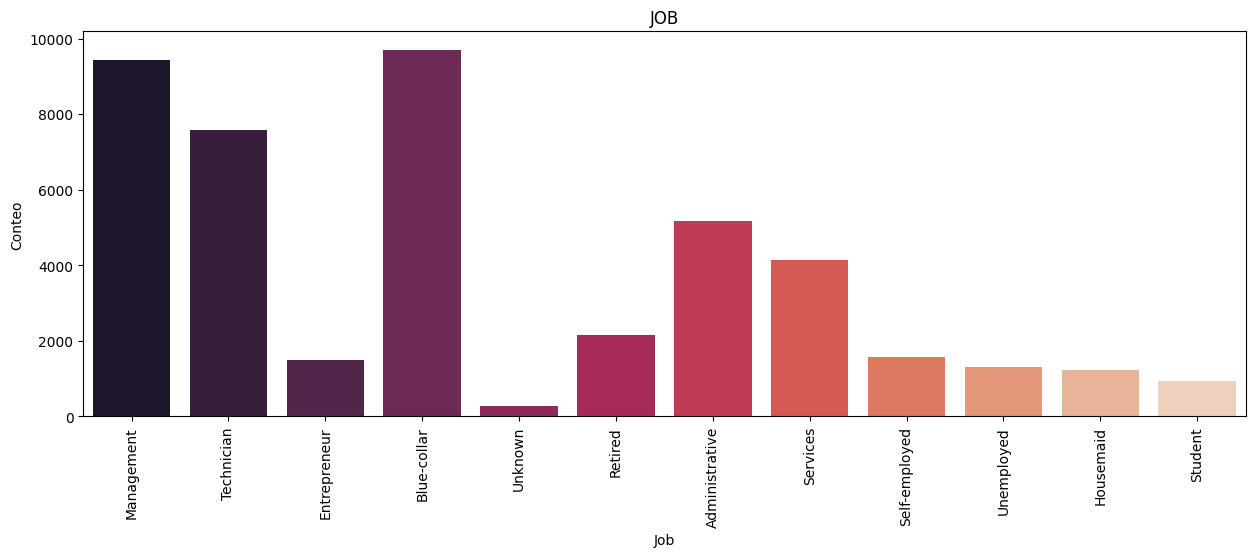

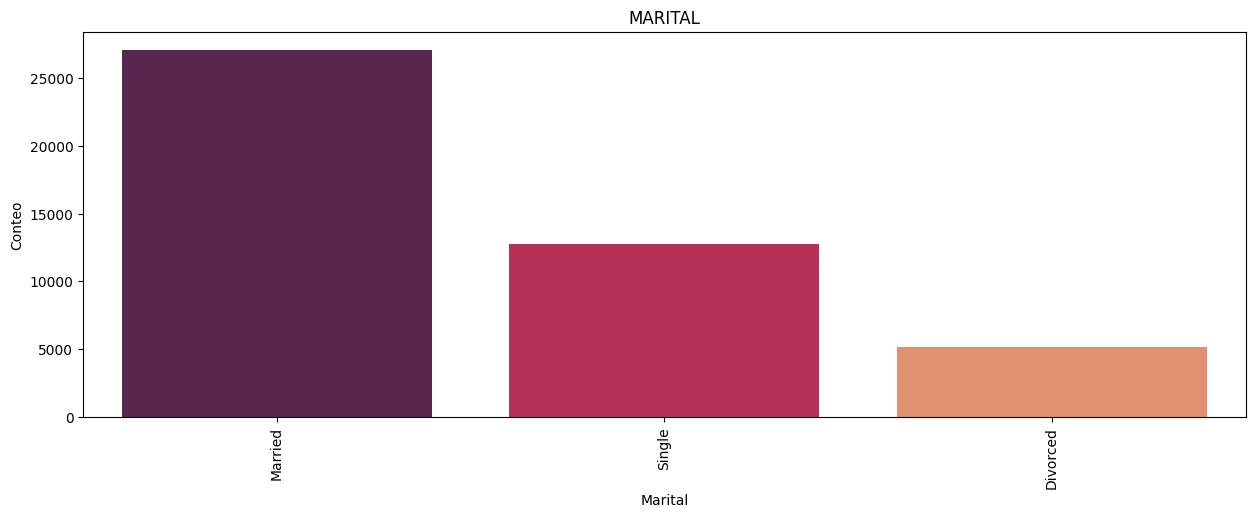

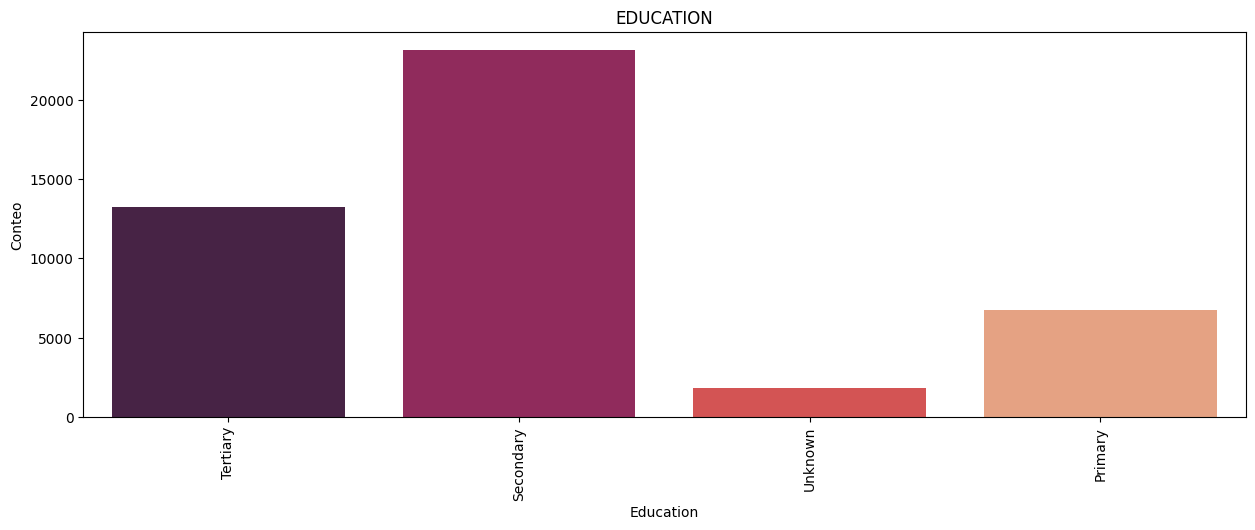

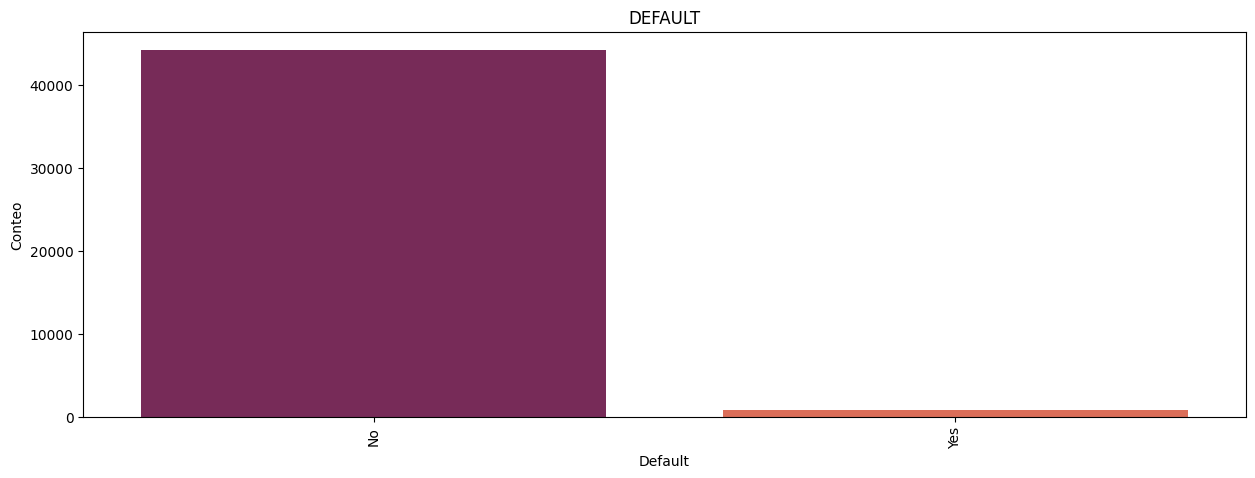

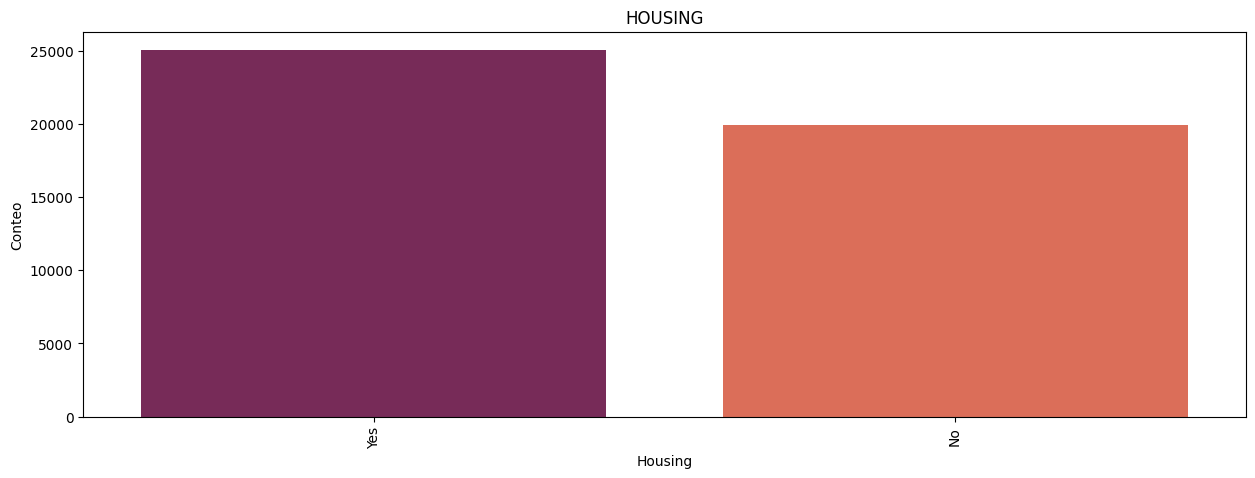

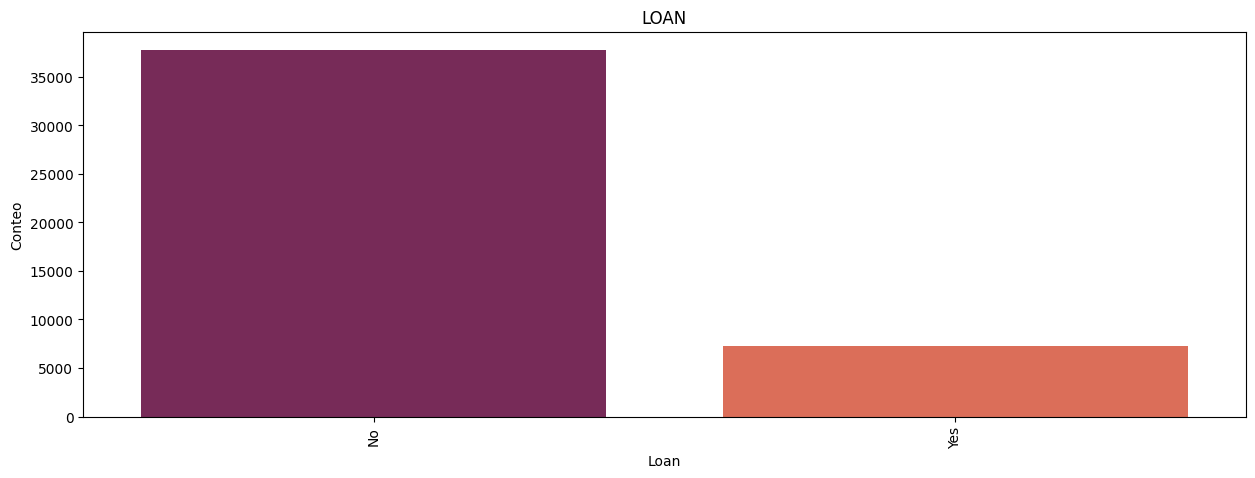

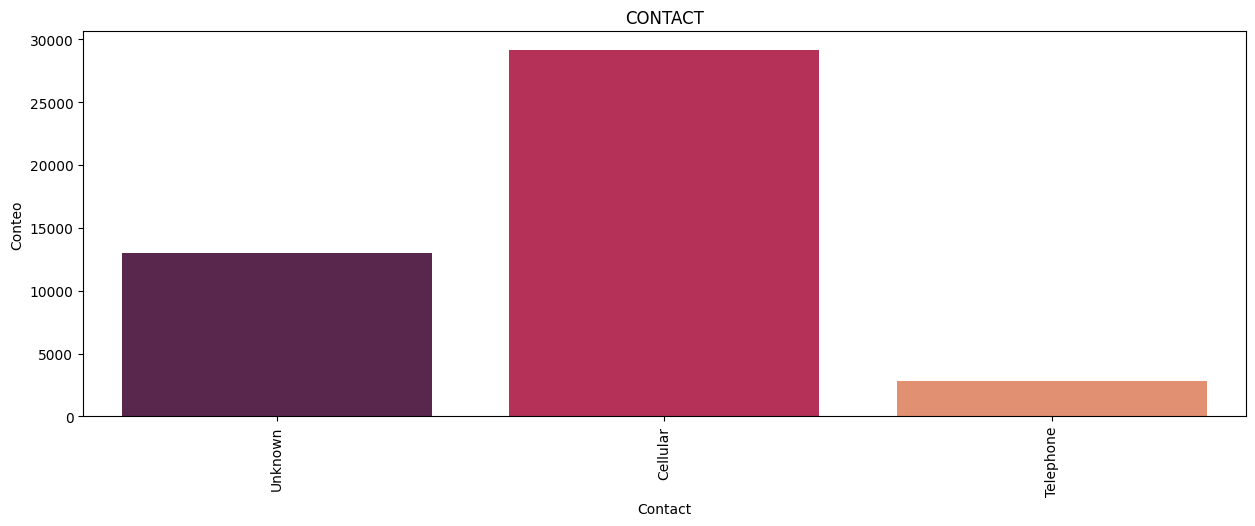

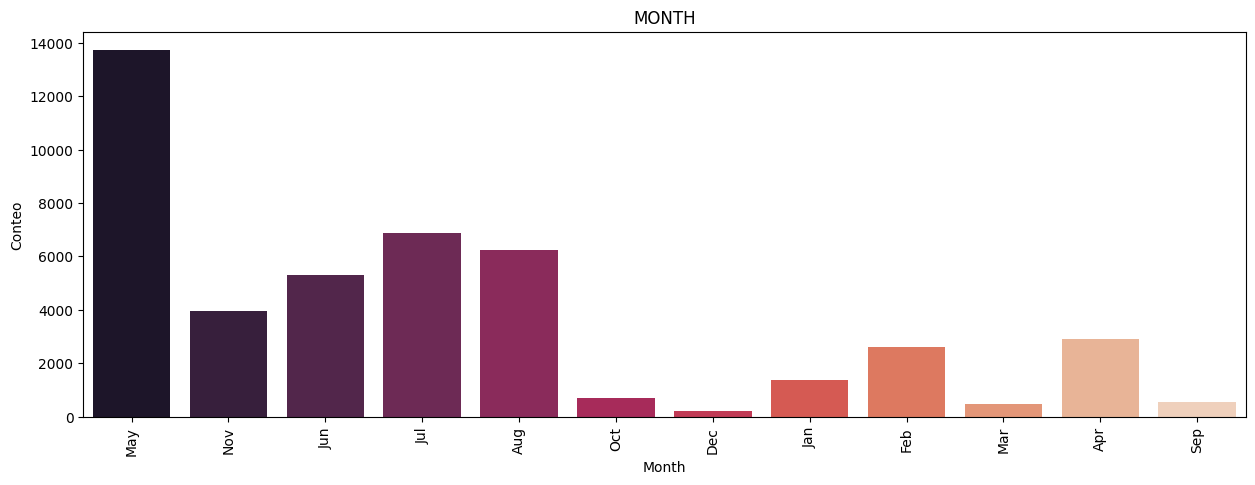

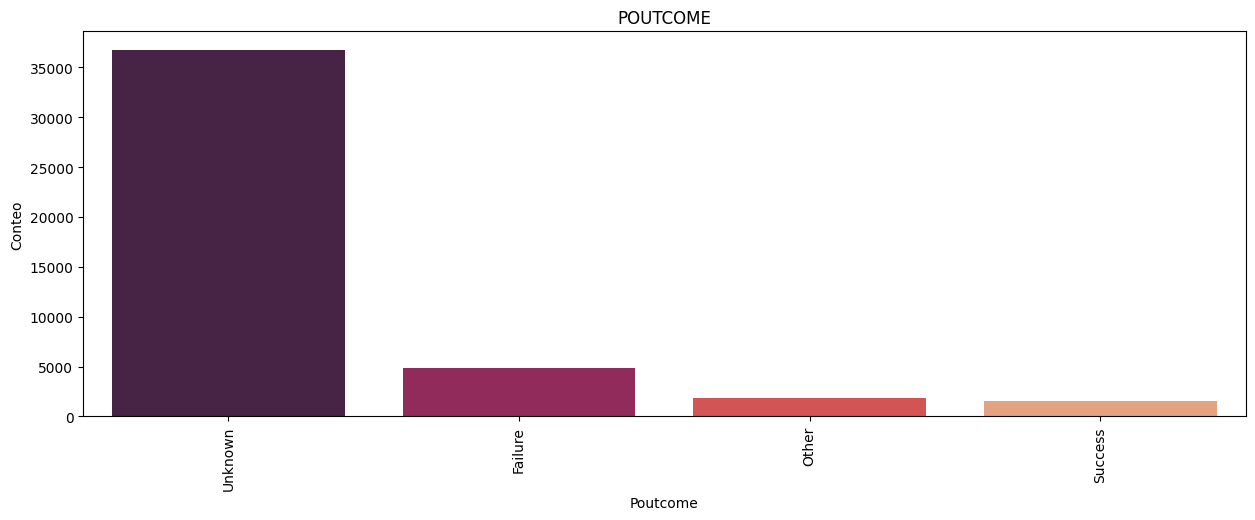

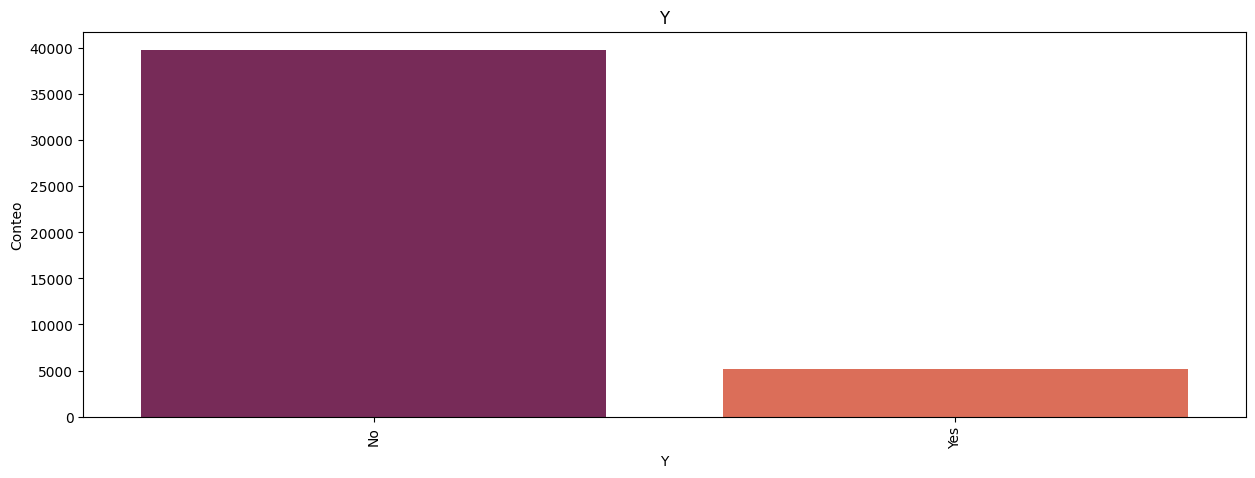

In [6]:
# Variables categóricas
for col in cols_categ:
  plt.figure(figsize=(15, 5))
  sns.countplot(x=col, data=df_bancos_clean, hue=col, palette='rocket')
  plt.title(col.upper())
  plt.xlabel(col.capitalize())
  plt.ylabel('Conteo')
  plt.xticks(rotation=90)
  plt.show()

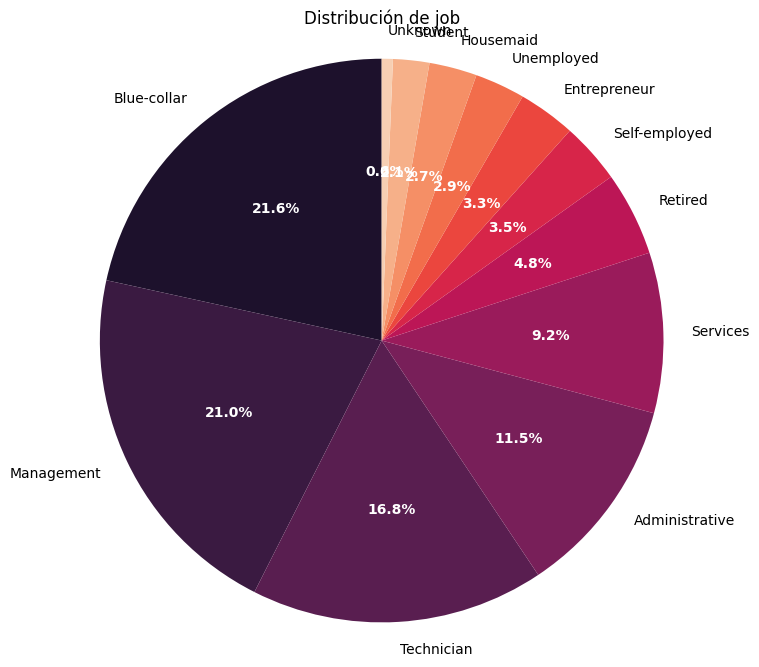

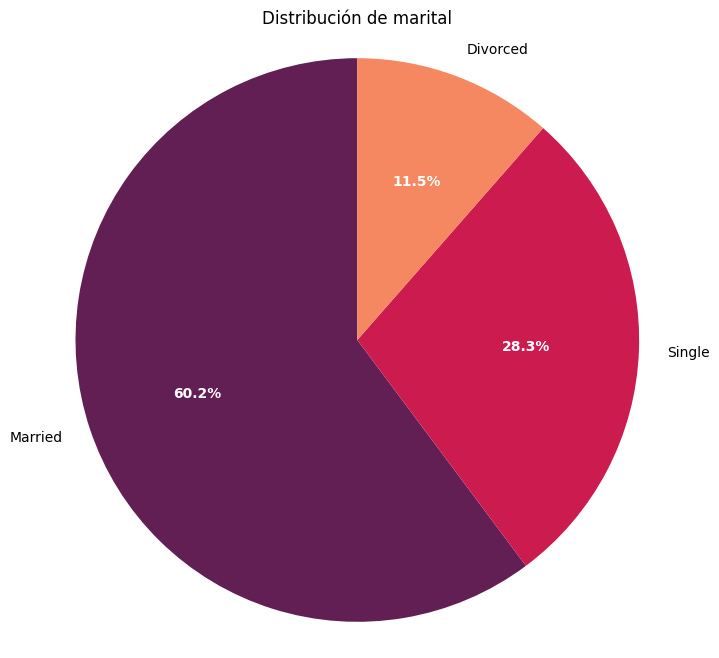

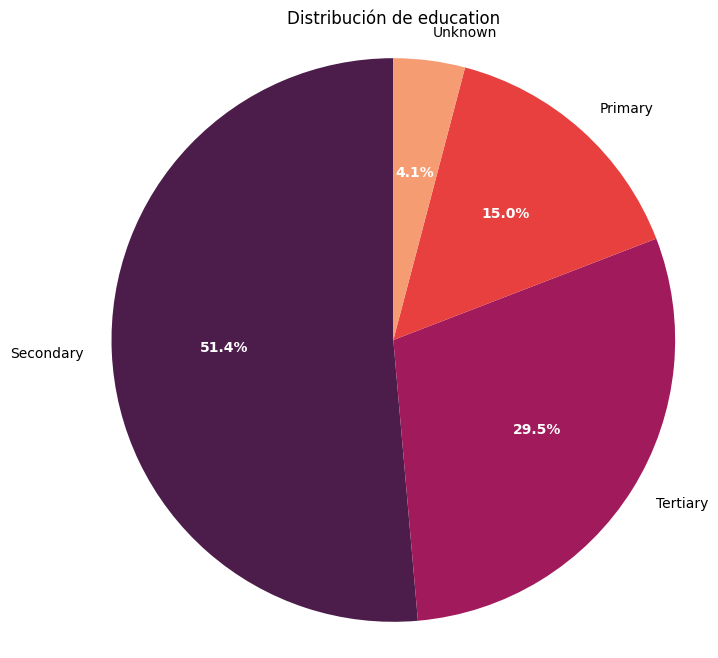

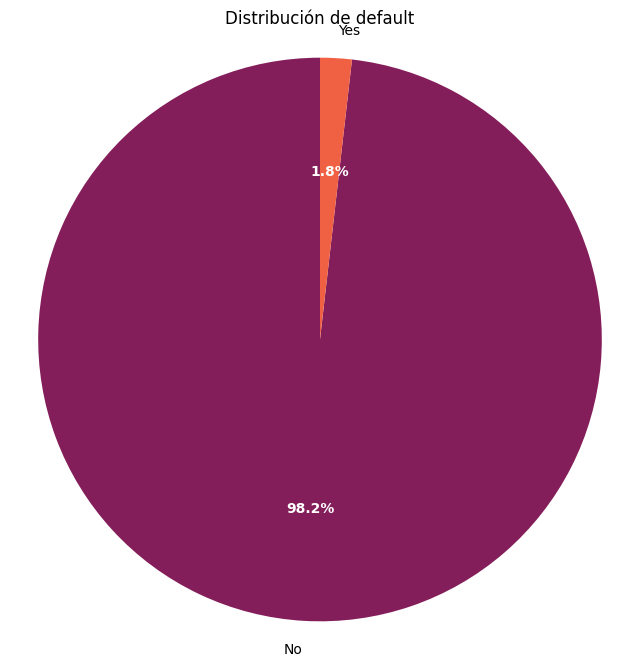

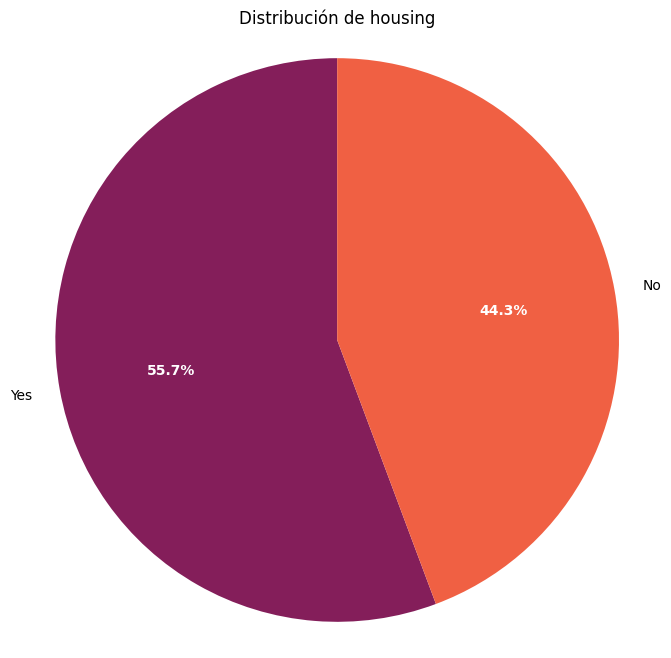

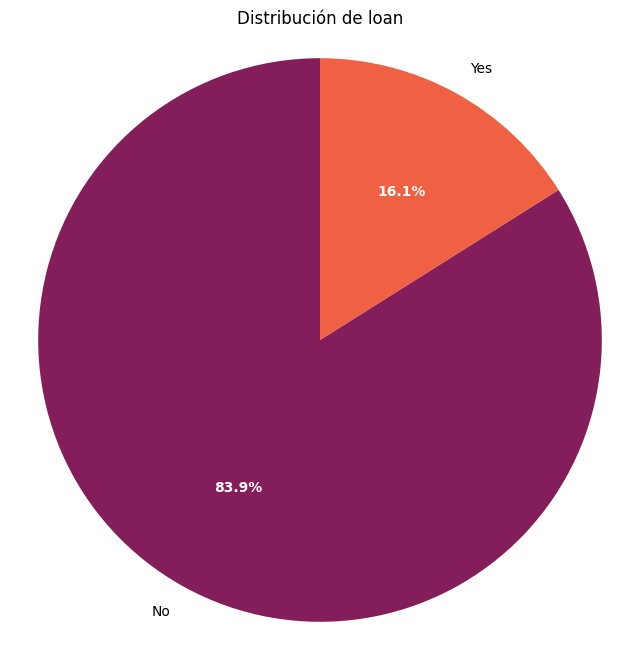

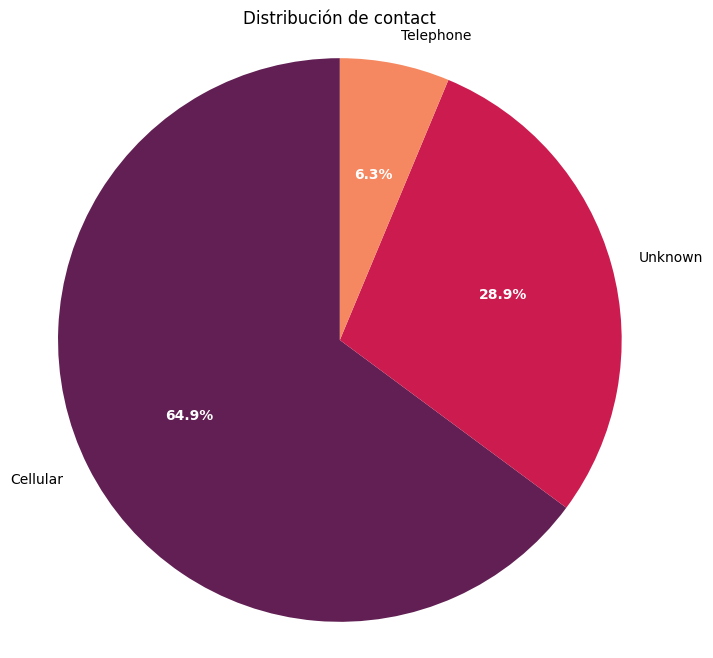

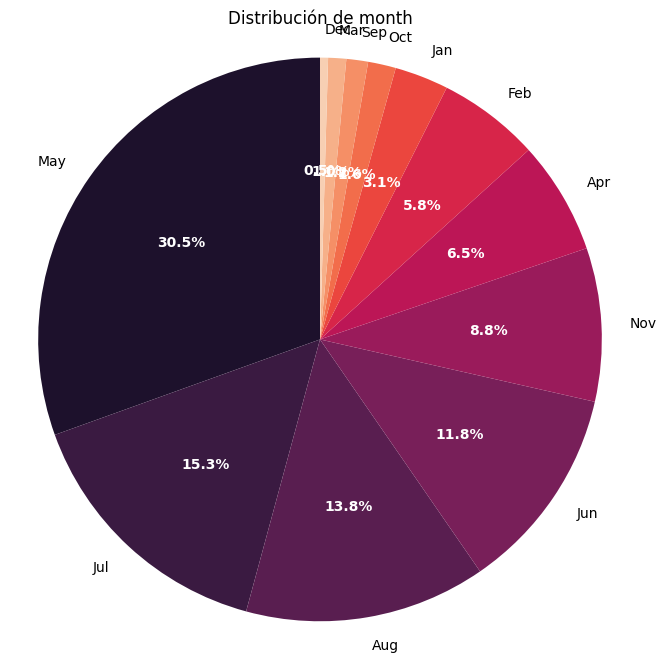

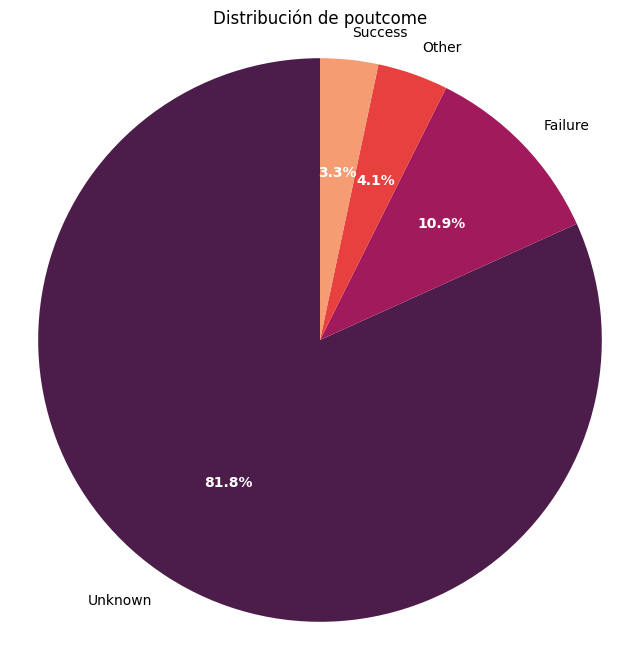

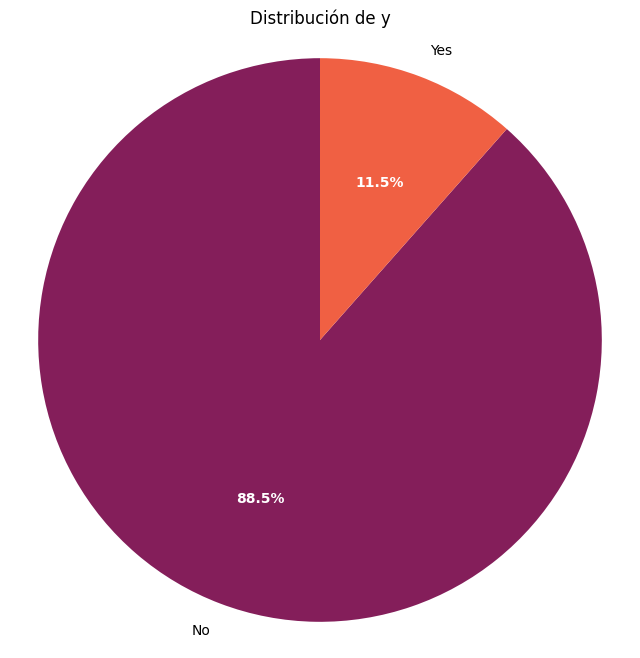

In [7]:
###
# Variables categóricas - Pie charts simples
###
for col in cols_categ:
    plt.figure(figsize=(8, 8))
    
    counts = df_bancos_clean[col].value_counts()
    colors = sns.color_palette('rocket', len(counts))
    
    # Gráfica de pie con texto blanco y sombra
    wedges, texts, autotexts = plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', 
                                      startangle=90, colors=colors)
    
    # Cambiar color de los porcentajes a blanco con sombra
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        # autotext.set_shadow(True)

    plt.title(f'Distribución de {col}')
    plt.axis('equal')
    
    plt.show()

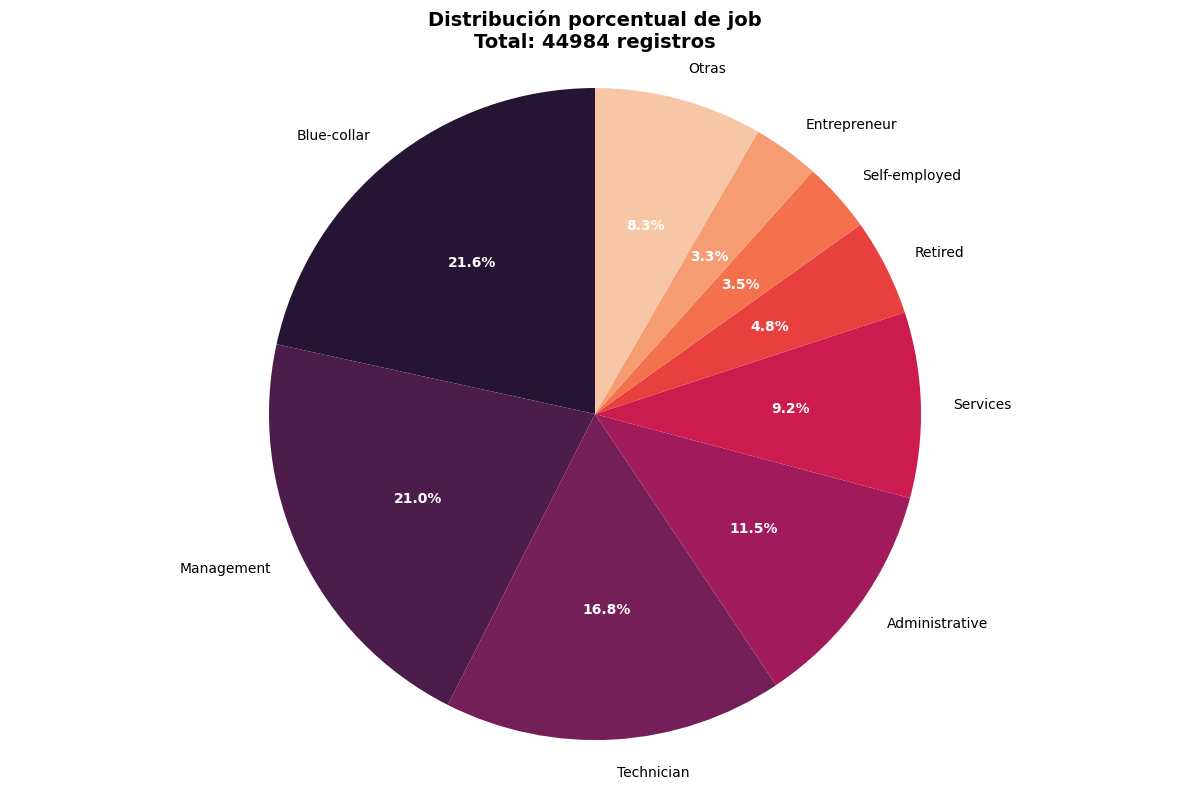


📊 Resumen estadístico - job:
     Categoría  Conteo  Porcentaje (%)
   Blue-collar    9701            21.6
    Management    9437            21.0
    Technician    7571            16.8
Administrative    5162            11.5
      Services    4137             9.2
       Retired    2168             4.8
 Self-employed    1574             3.5
  Entrepreneur    1483             3.3
         Otras    3751             8.3
--------------------------------------------------


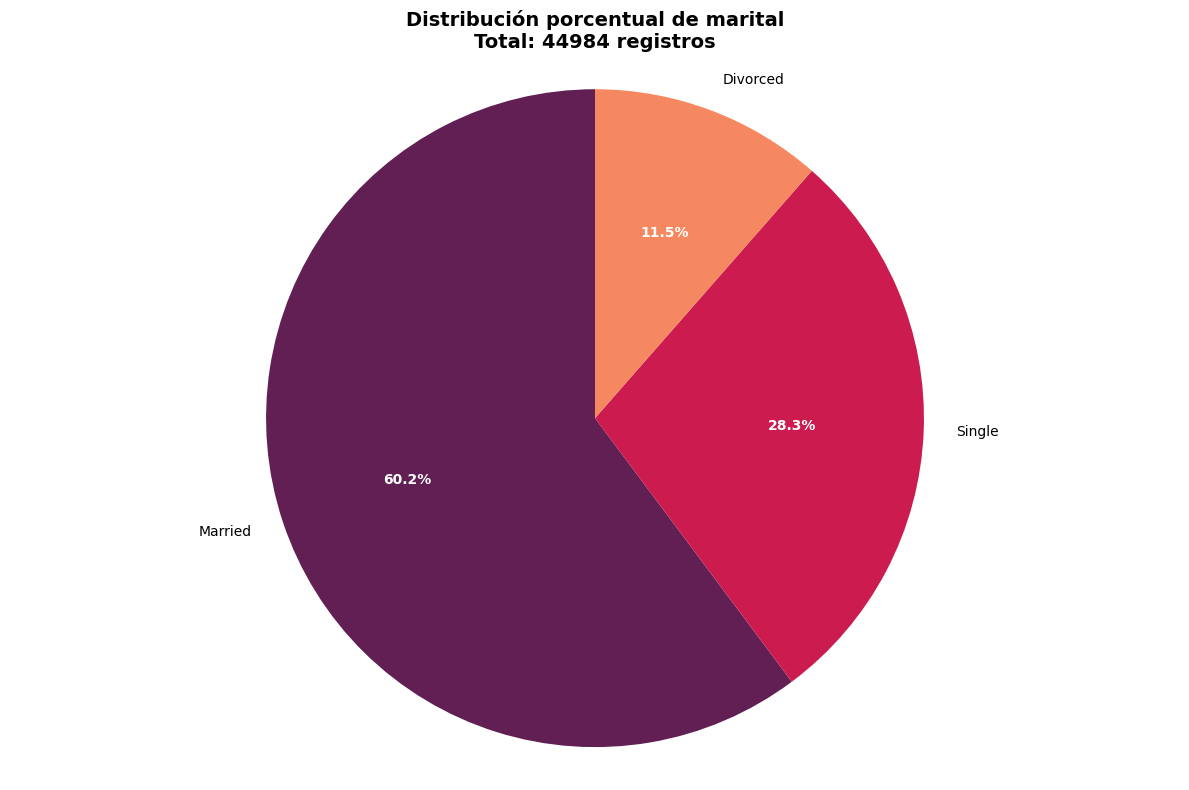


📊 Resumen estadístico - marital:
Categoría  Conteo  Porcentaje (%)
  Married   27083            60.2
   Single   12747            28.3
 Divorced    5154            11.5
--------------------------------------------------


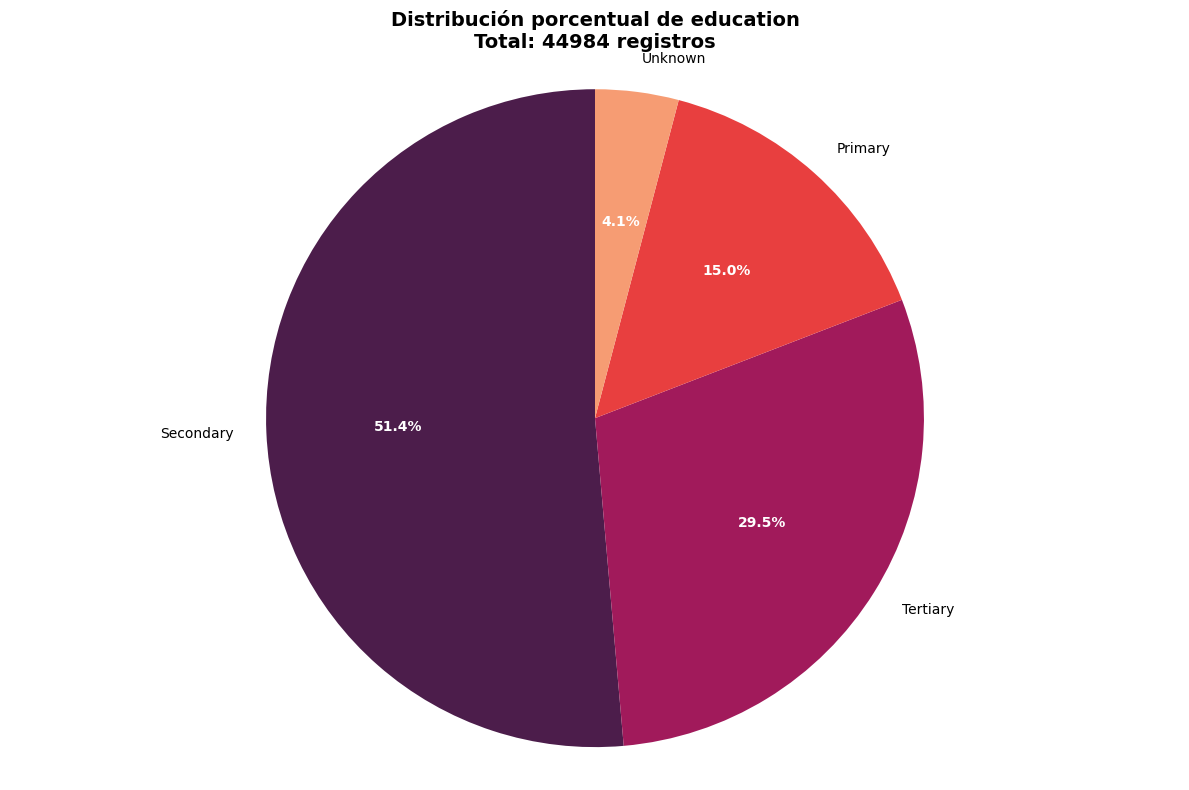


📊 Resumen estadístico - education:
Categoría  Conteo  Porcentaje (%)
Secondary   23118            51.4
 Tertiary   13255            29.5
  Primary    6768            15.0
  Unknown    1843             4.1
--------------------------------------------------


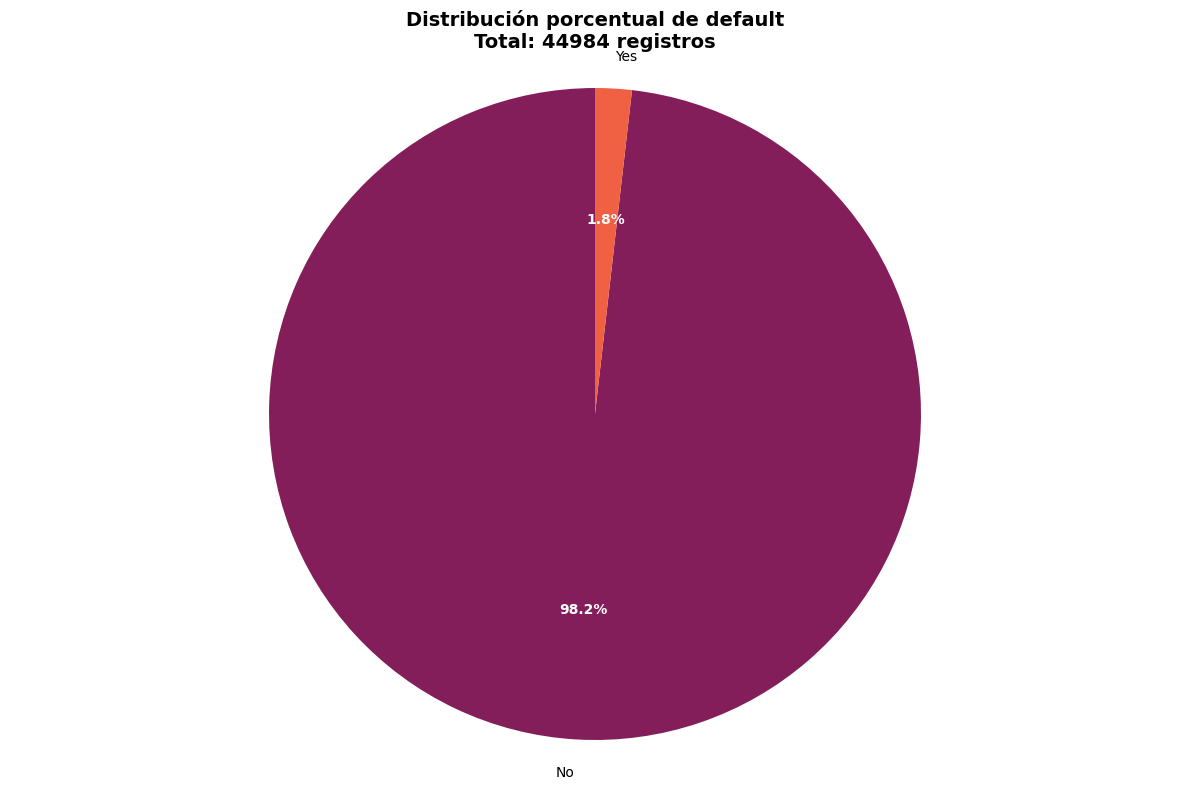


📊 Resumen estadístico - default:
Categoría  Conteo  Porcentaje (%)
       No   44169            98.2
      Yes     815             1.8
--------------------------------------------------


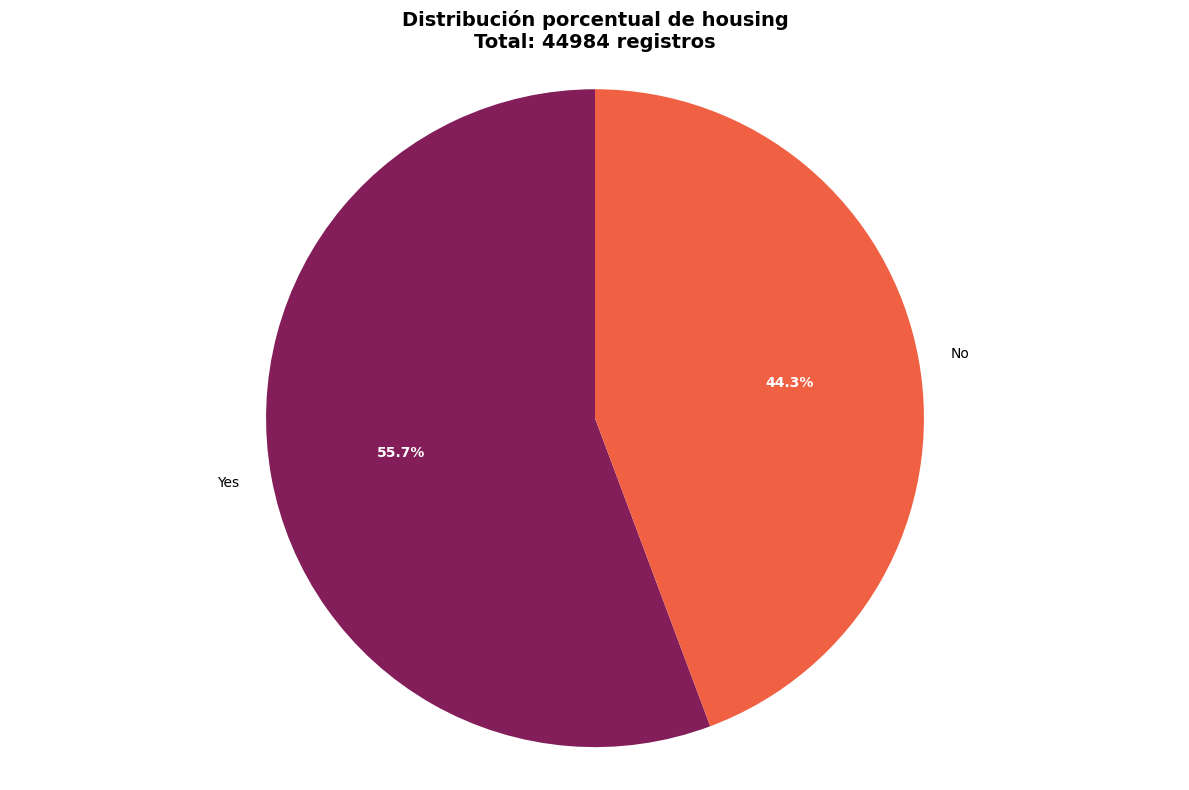


📊 Resumen estadístico - housing:
Categoría  Conteo  Porcentaje (%)
      Yes   25055            55.7
       No   19929            44.3
--------------------------------------------------


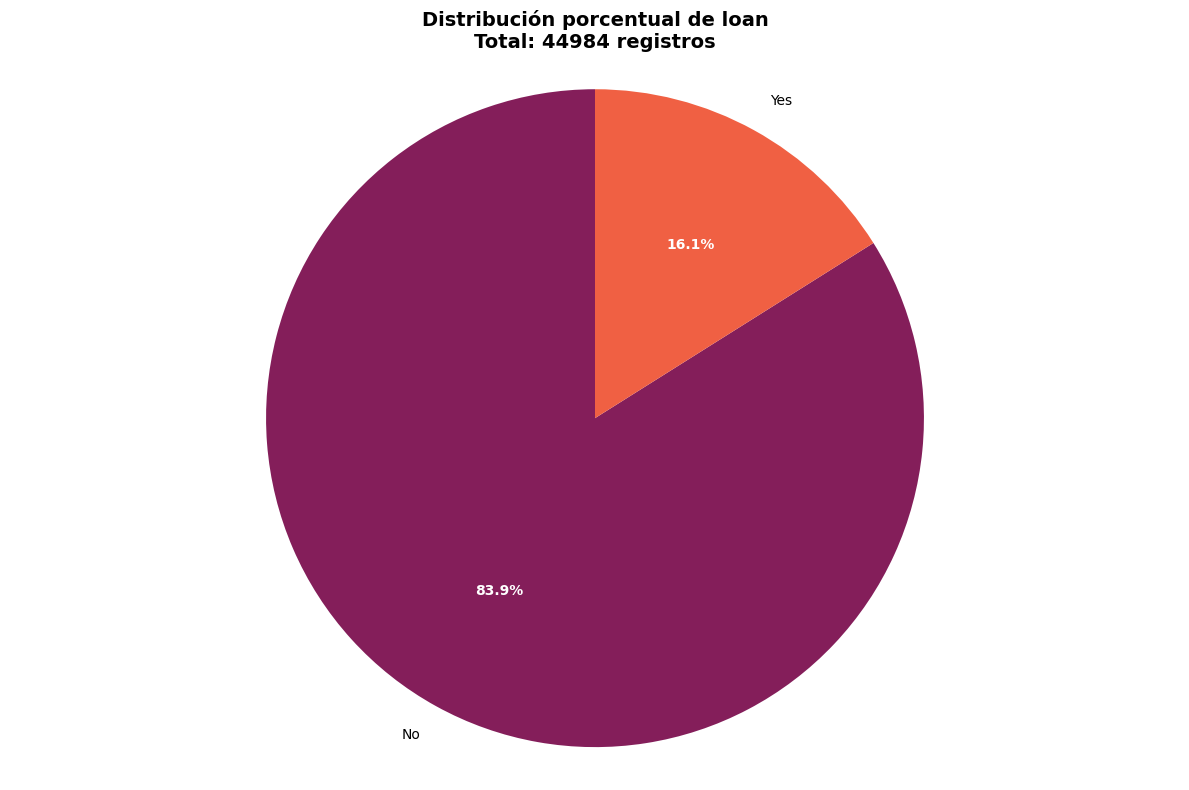


📊 Resumen estadístico - loan:
Categoría  Conteo  Porcentaje (%)
       No   37759            83.9
      Yes    7225            16.1
--------------------------------------------------


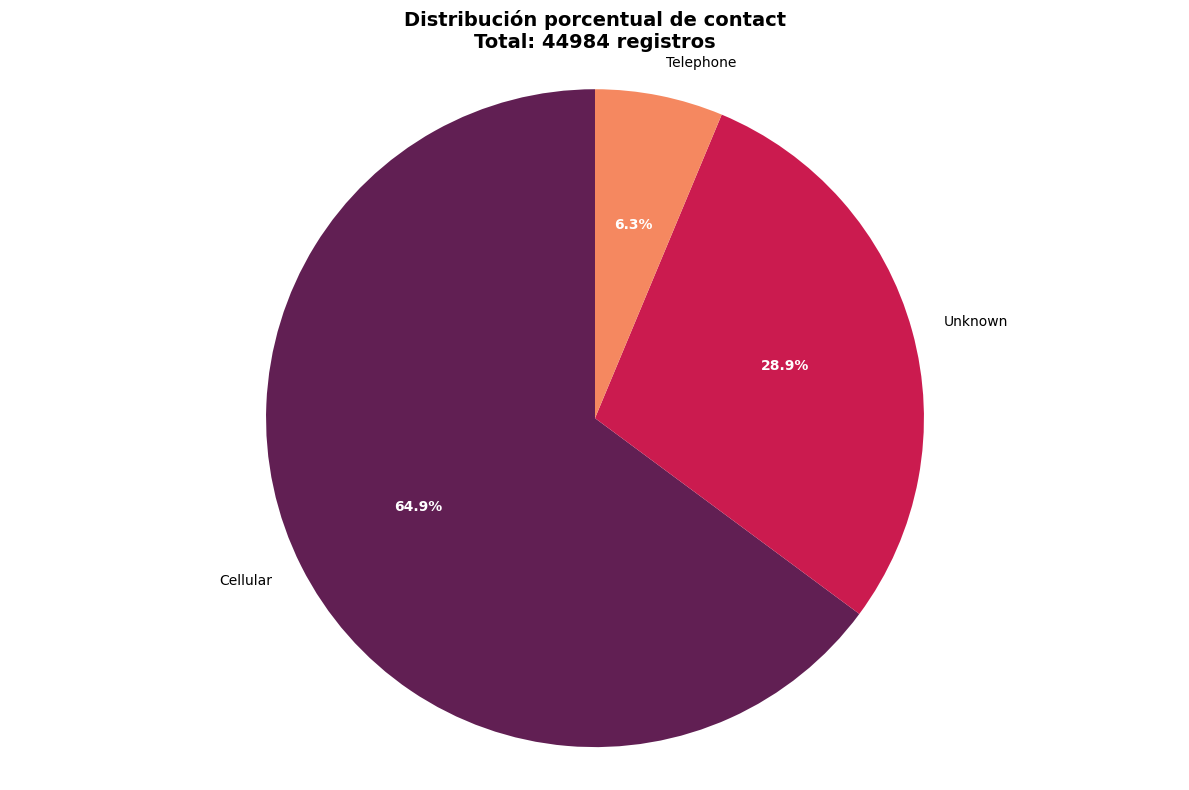


📊 Resumen estadístico - contact:
Categoría  Conteo  Porcentaje (%)
 Cellular   29174            64.9
  Unknown   12979            28.9
Telephone    2831             6.3
--------------------------------------------------


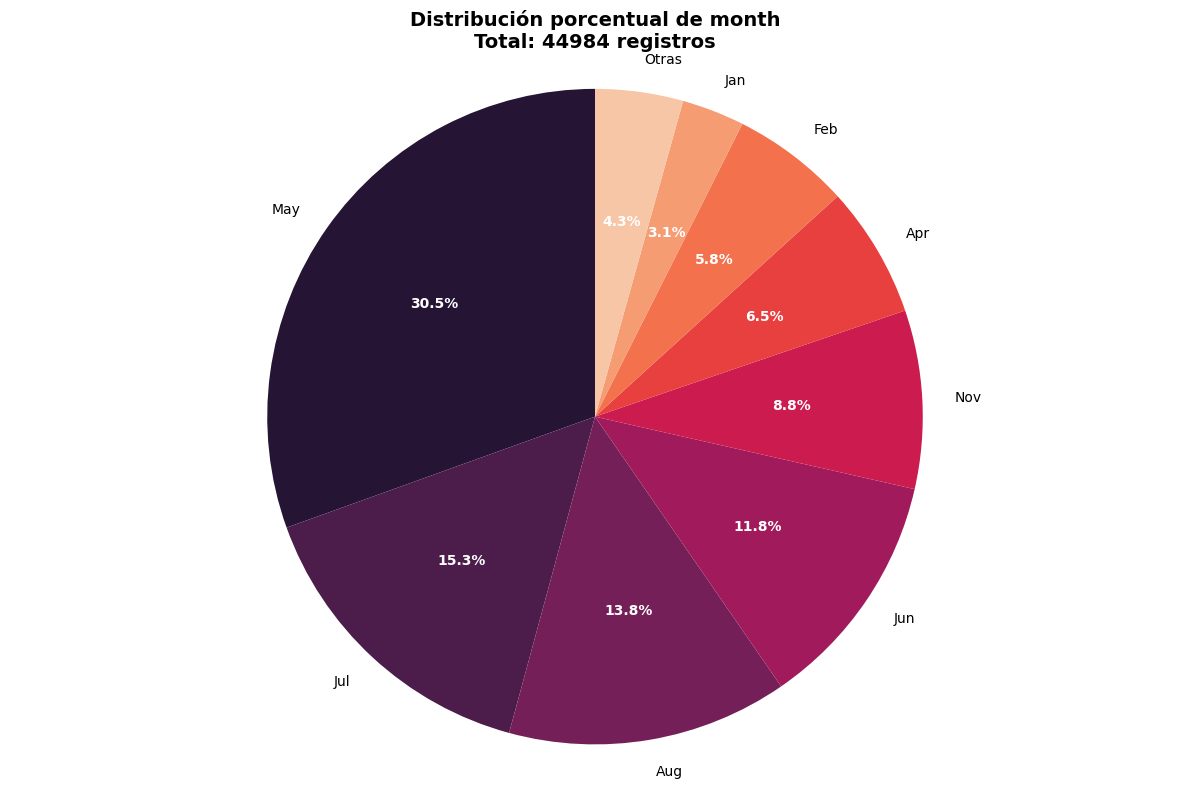


📊 Resumen estadístico - month:
Categoría  Conteo  Porcentaje (%)
      May   13719            30.5
      Jul    6874            15.3
      Aug    6224            13.8
      Jun    5324            11.8
      Nov    3957             8.8
      Apr    2918             6.5
      Feb    2629             5.8
      Jan    1390             3.1
    Otras    1949             4.3
--------------------------------------------------


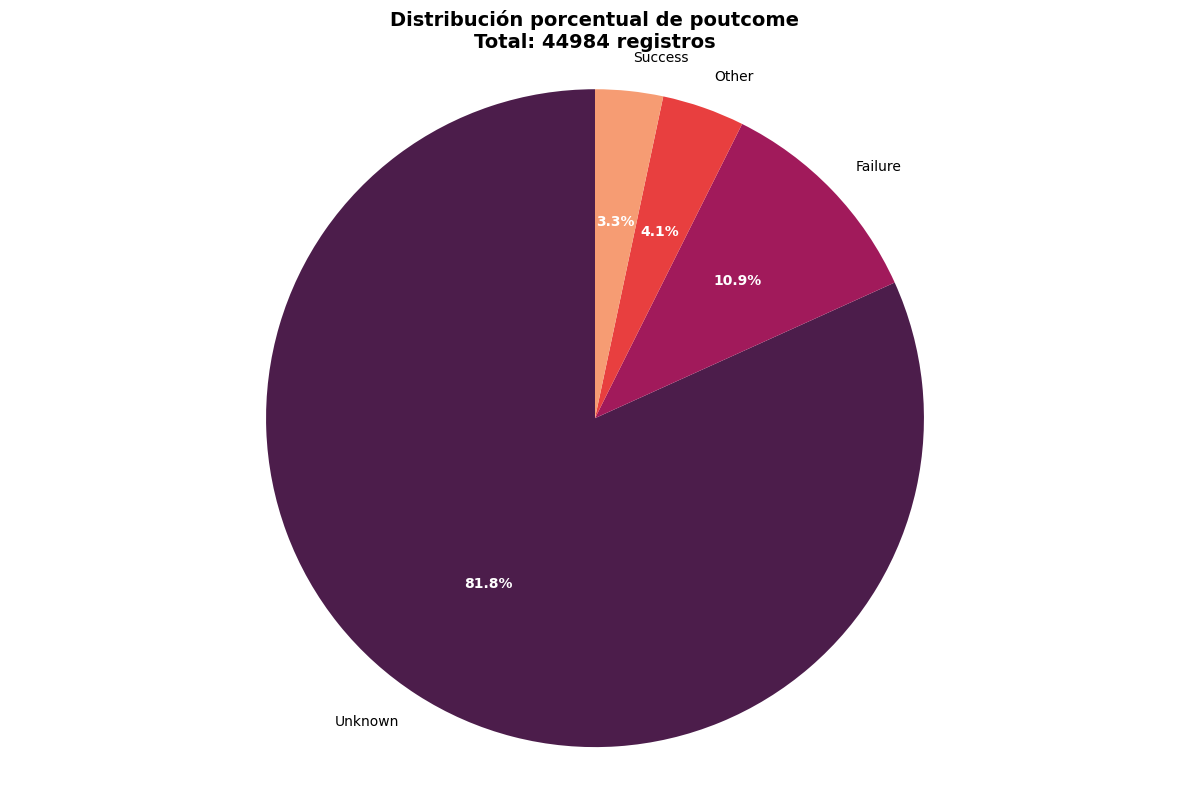


📊 Resumen estadístico - poutcome:
Categoría  Conteo  Porcentaje (%)
  Unknown   36781            81.8
  Failure    4883            10.9
    Other    1823             4.1
  Success    1497             3.3
--------------------------------------------------


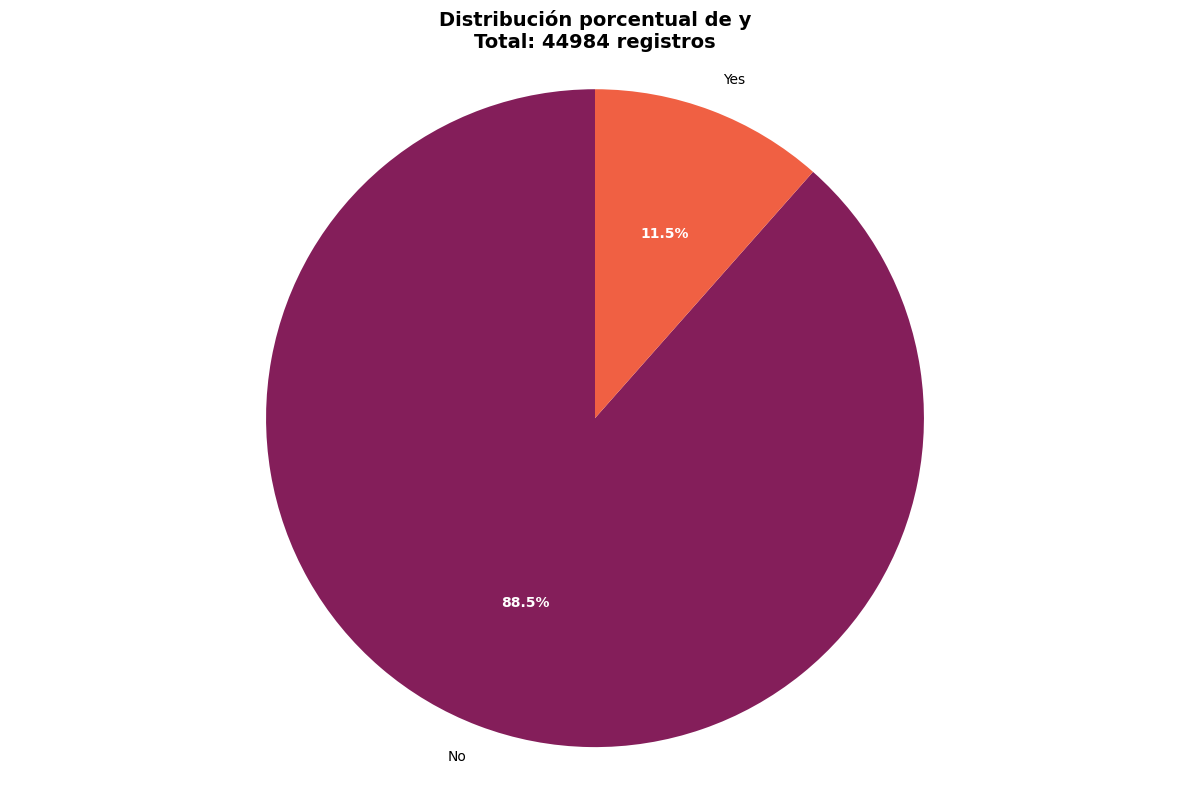


📊 Resumen estadístico - y:
Categoría  Conteo  Porcentaje (%)
       No   39797            88.5
      Yes    5187            11.5
--------------------------------------------------


In [8]:
###
# Variables categóricas - Gráficas de pie mejoradas
###
for col in cols_categ:
    plt.figure(figsize=(12, 8))
    
    # Calcular estadísticas
    counts = df_bancos_clean[col].value_counts()
    total = counts.sum()
    percentages = (counts / total * 100).round(1)
    
    # Filtrar categorías muy pequeñas para mejor visualización
    if len(counts) > 10:
        # Si hay muchas categorías, mostrar solo las top 8 y agrupar el resto
        top_counts = counts.head(8)
        other_count = counts[8:].sum()
        counts = pd.concat([top_counts, pd.Series([other_count], index=['Otras'])])
        percentages = (counts / total * 100).round(1)
    
    # Crear gráfica de pie
    wedges, texts, autotexts = plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', 
                                      startangle=90, colors=sns.color_palette('rocket', len(counts)),
                                      textprops={'fontsize': 10})
    
    # Mejorar los textos de porcentaje
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    
    plt.title(f'Distribución porcentual de {col}\nTotal: {total} registros', fontsize=14, fontweight='bold')
    plt.axis('equal')
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar tabla resumen
    print(f'\n📊 Resumen estadístico - {col}:')
    summary_df = pd.DataFrame({
        'Categoría': counts.index,
        'Conteo': counts.values,
        'Porcentaje (%)': percentages
    })
    print(summary_df.to_string(index=False))
    print('-' * 50)

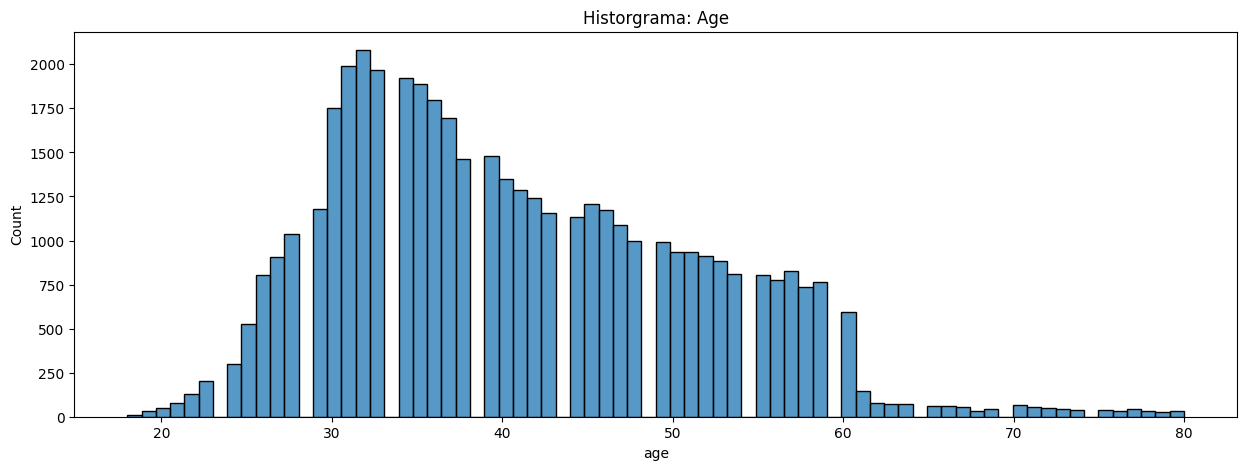

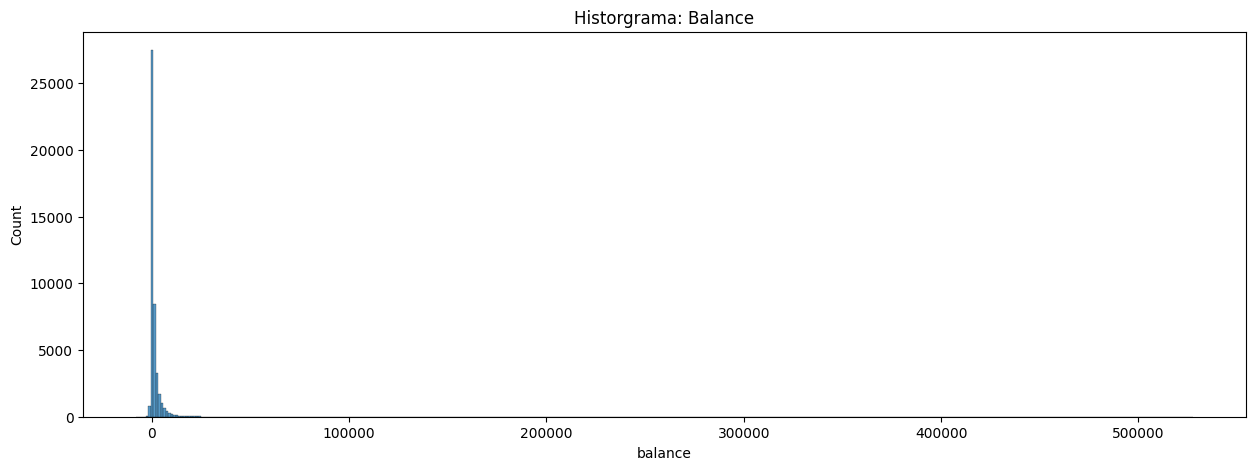

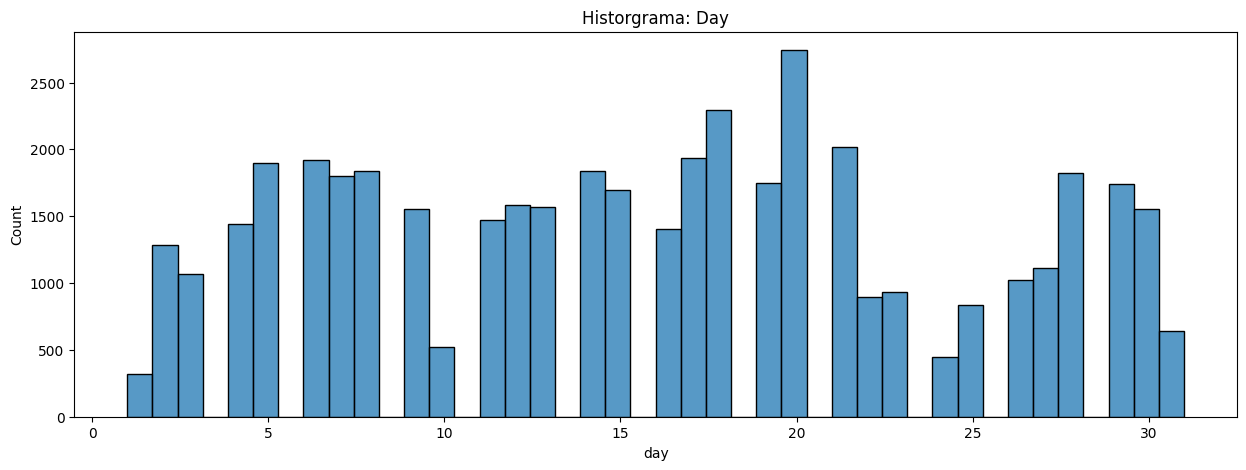

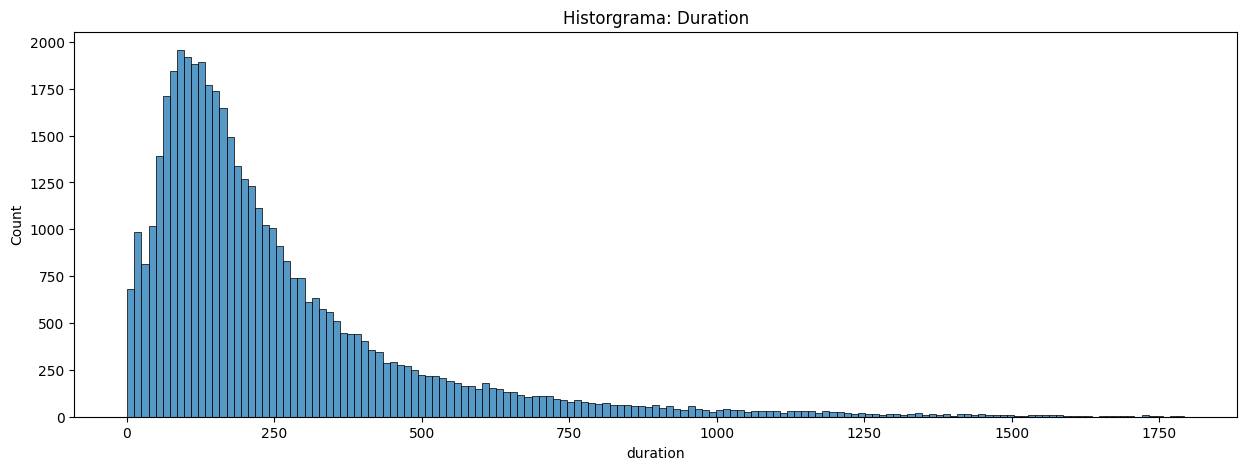

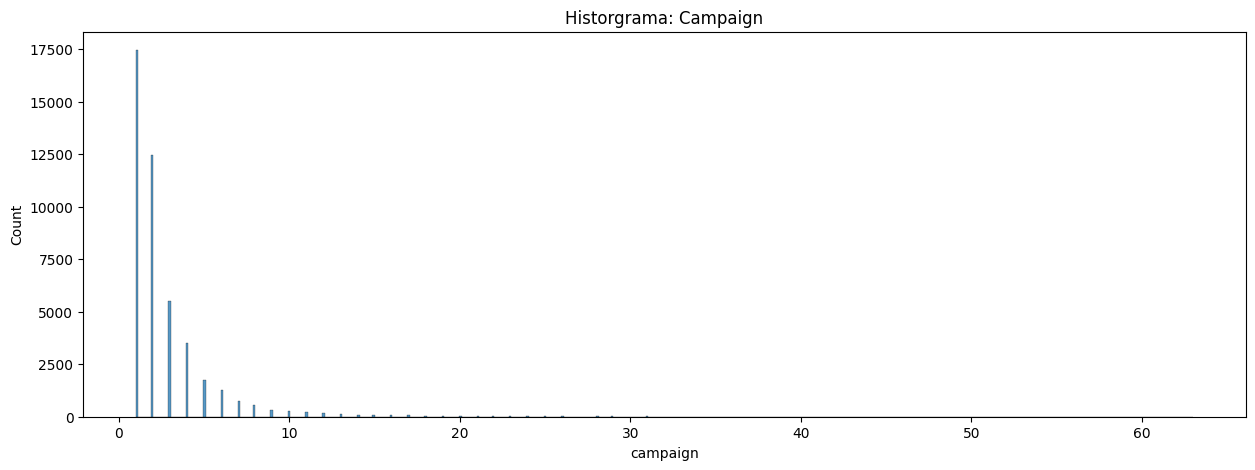

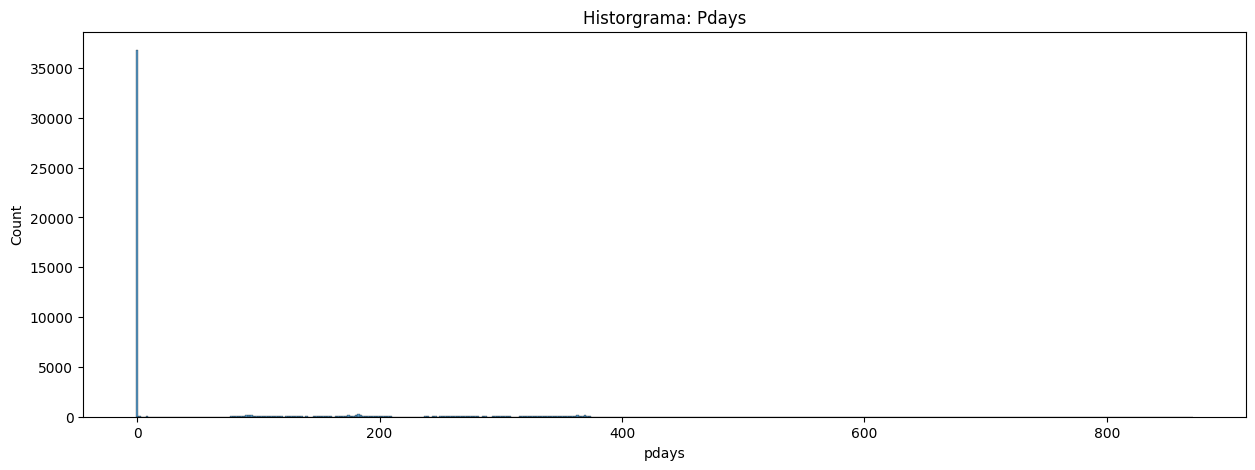

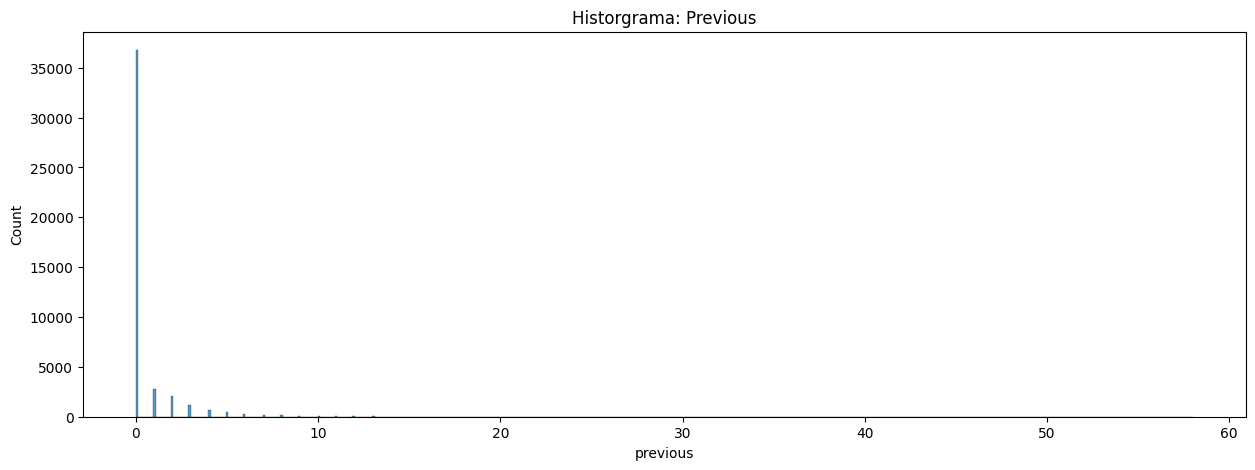

In [9]:
###
# Variables Numéricas
###
for col in cols_num:
  plt.figure(figsize=(15, 5))
  sns.histplot(x=col, data=df_bancos_clean)
  plt.title(f'Historgrama: {col.capitalize()}')
  plt.show()

In [10]:
###
# Eliminar
###
columns_drop =['month', 'day', 'duration', 'campaign', 'contact', 'pdays', 'previous']
df_bancos_clean.drop(columns=columns_drop, inplace=True)

In [11]:
df_bancos_clean.shape

(44984, 10)

# 4.1 Análisis Univariado

In [12]:
###
# Columnas: Categóricas y numéricas
###
columnas = list(df_bancos_clean.keys())
cols_categ = [x for x in columnas if df_bancos_clean[x].dtype == 'object']
cols_num = [x for x in columnas if df_bancos_clean[x].dtype != 'object']

In [13]:
###
# Cuantificar la salida
###
dic_salida = {'Yes': 1, 'No': 0}
df_bancos_clean['y_bin'] = df_bancos_clean['y'].map(dic_salida)

In [14]:
df_bancos_clean.sample(10)

,age,job,marital,education,default,balance,housing,loan,poutcome,y,y_bin
13766,45,Administrative,Single,Secondary,No,205.0,No,Yes,Unknown,No,0
15406,60,Retired,Married,Primary,No,949.0,No,Yes,Unknown,No,0
12432,49,Housemaid,Married,Primary,No,935.0,No,Yes,Unknown,No,0
22383,35,Technician,Single,Tertiary,No,296.0,No,No,Unknown,No,0
35132,28,Services,Single,Secondary,No,6332.0,Yes,No,Failure,No,0
39349,30,Technician,Single,Secondary,No,156.0,Yes,No,Failure,No,0
9520,38,Housemaid,Married,Primary,No,3577.0,No,No,Unknown,No,0
43550,46,Management,Single,Secondary,No,5993.0,No,No,Failure,No,0
29791,52,Blue-collar,Married,Secondary,No,2338.0,Yes,No,Unknown,No,0
33028,57,Administrative,Married,Primary,No,202.0,Yes,No,Failure,No,0


# Relación con la variable Categórica

In [15]:
def grafica_barras(var_entr, orden=None):
  grupo = df_bancos_clean.groupby(var_entr)['y_bin'].mean().mul(100).rename('Taza_conver').reset_index()
  plt.figure(figsize=(15, 5))
  sns.barplot(x=var_entr, y= 'Taza_conver',data=grupo, hue=var_entr, palette='rocket', order=orden)
  plt.title(var_entr.upper())
  plt.xticks(rotation=60)
  plt.grid()
  plt.show()

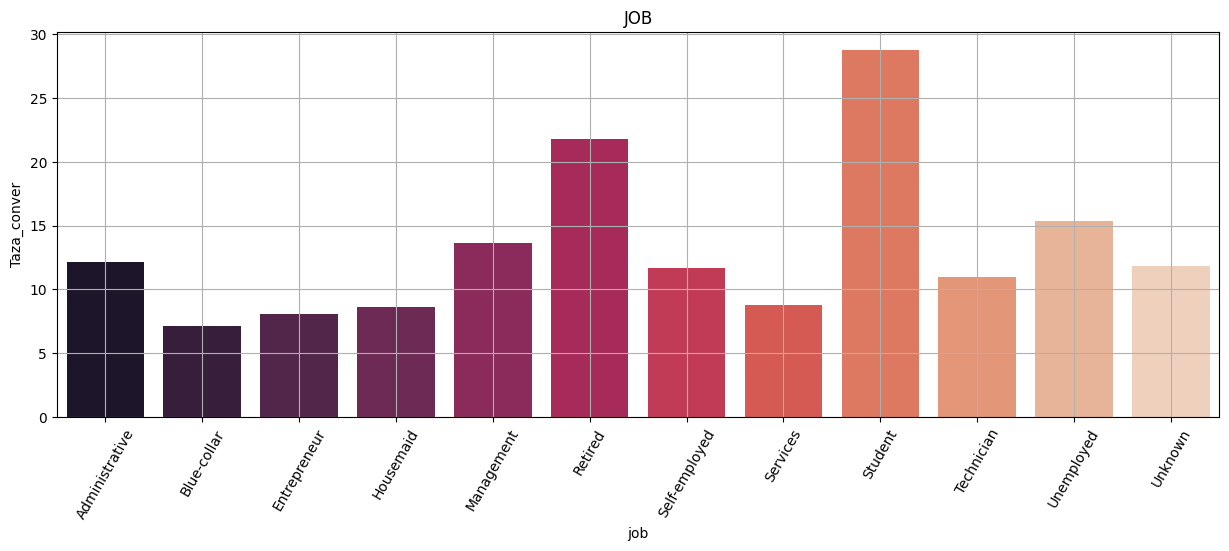

In [16]:
###
# Job se identifica una diferenciador entra los que que tuvieron un si (1) en la salida de la campaña osea adquirieron el producto
###
grafica_barras('job')

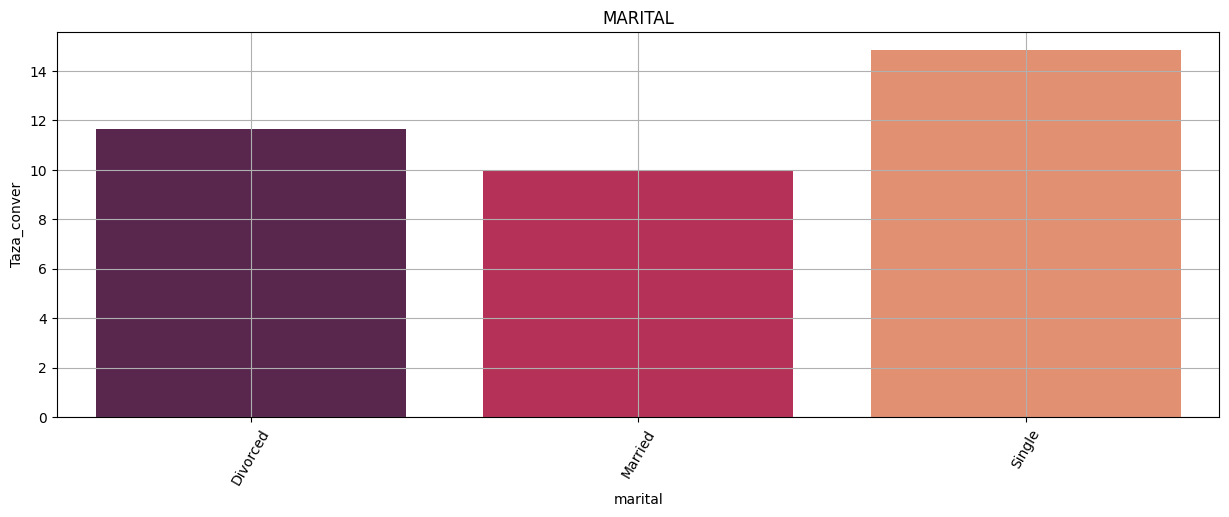

In [17]:
###
# Marital
###
grafica_barras('marital')

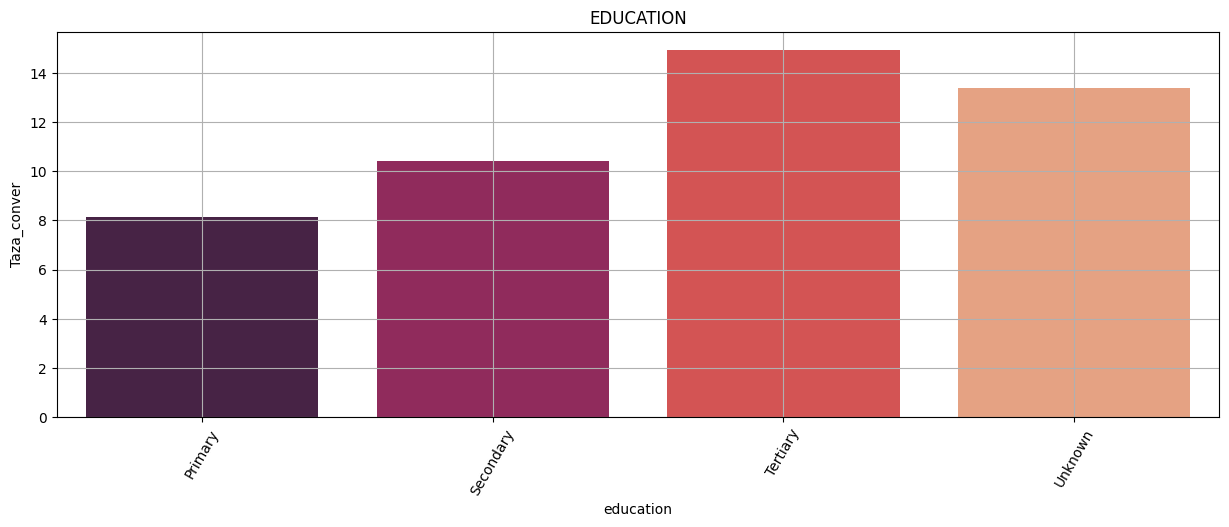

In [18]:
###
# Educación
###
grafica_barras('education')

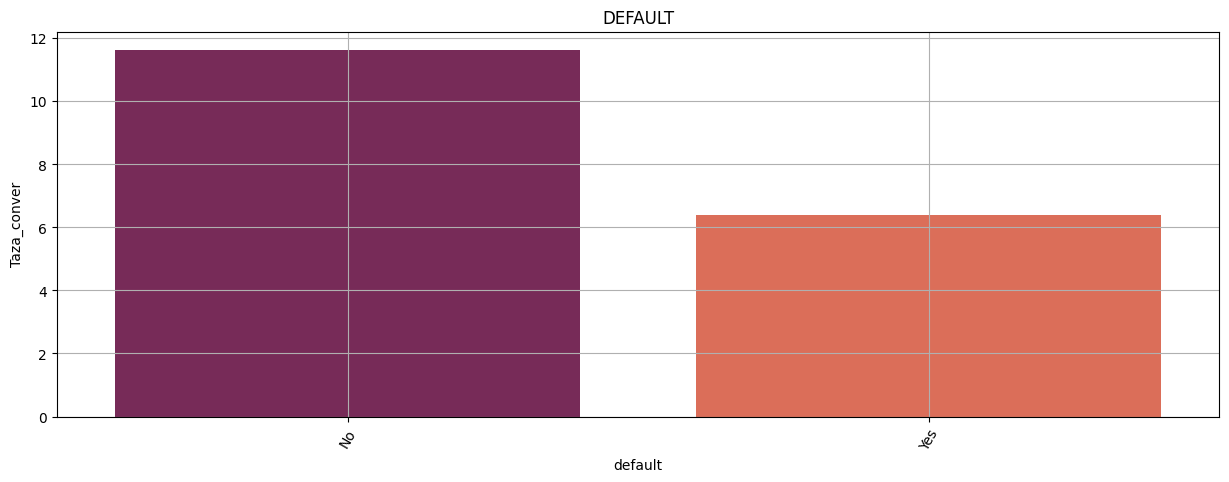

In [19]:
###
# Default
###
grafica_barras('default')

# Los que son cumplidos en pagar sus responsabilidades son propensos a adquirir 

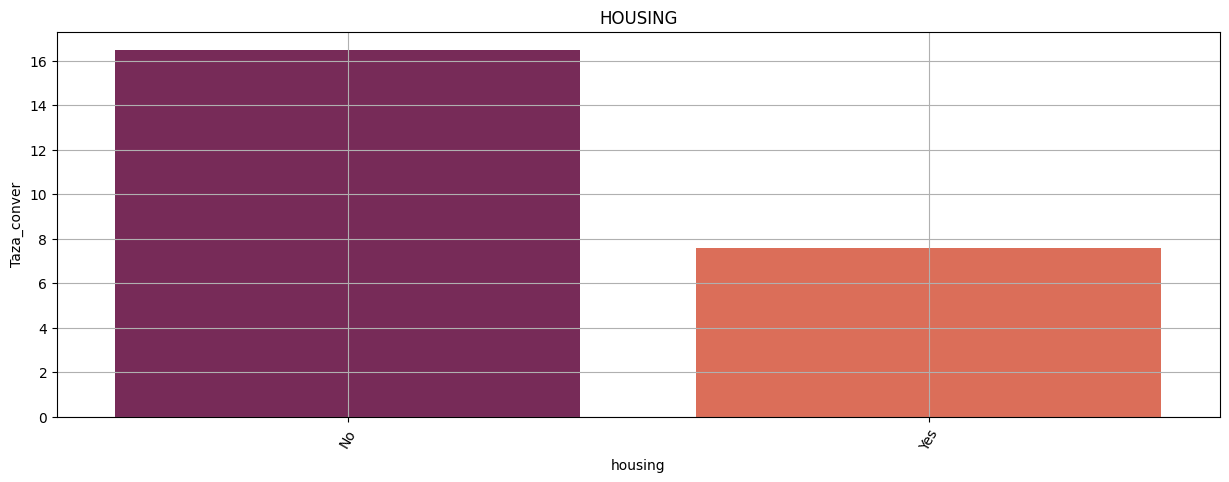

In [20]:
###
# Housing
###
grafica_barras('housing')

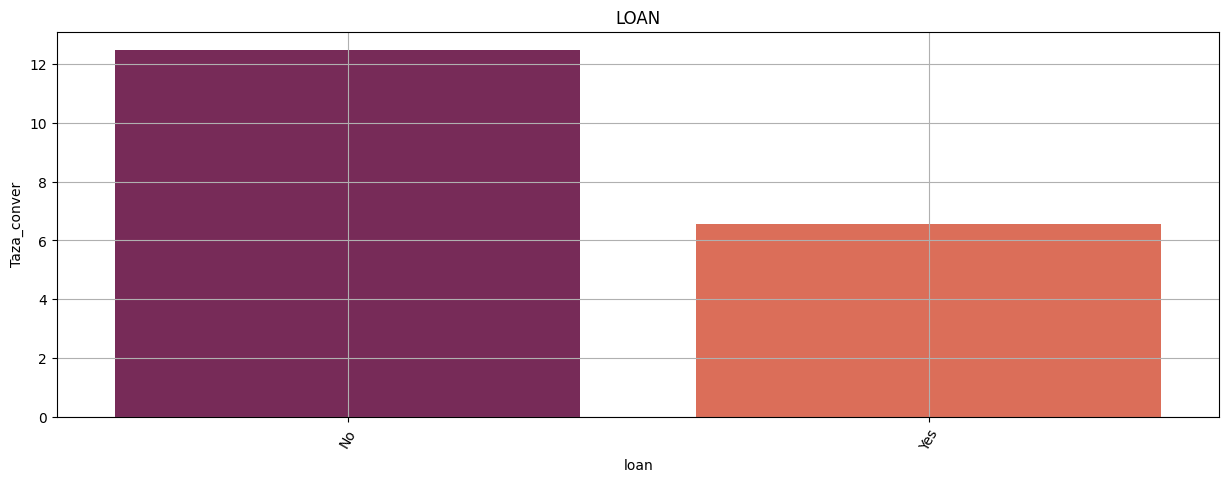

In [21]:
# Loan
grafica_barras('loan')

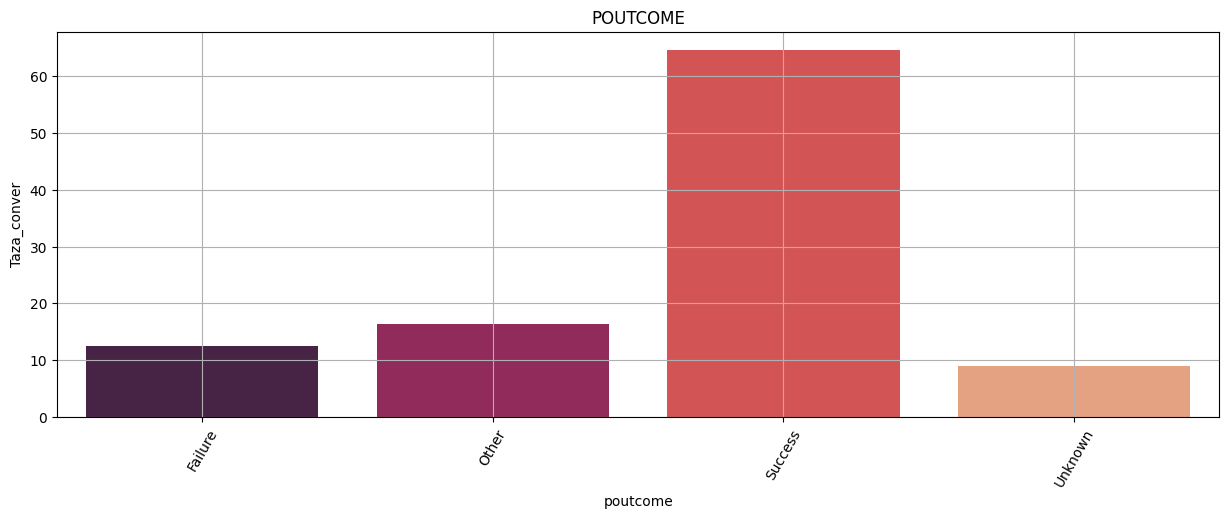

In [22]:
# Poutcome
grafica_barras('poutcome')

<function matplotlib.pyplot.show(close=None, block=None)>

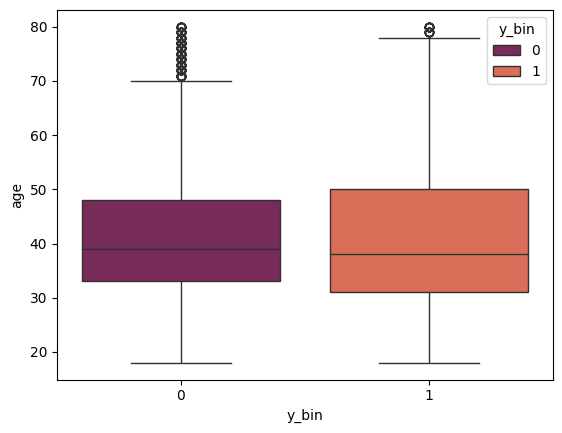

In [23]:
plt.Figure(figsize=(15,5))
sns.boxplot(x='y_bin', y = 'age', data=df_bancos_clean, hue='y_bin', palette='rocket')
plt.show

In [24]:
###
# Edad
###
df_bancos_clean.describe()

,age,balance,y_bin
count,44984.000000,44984.000000,44984.000000
mean,40.837431,1370.053819,0.115308
std,10.432985,3894.389006,0.319396
min,18.000000,-8019.000000,0.000000
25%,33.000000,72.000000,0.000000
50%,39.000000,447.000000,0.000000
75%,48.000000,1425.000000,0.000000
max,80.000000,527532.000000,1.000000


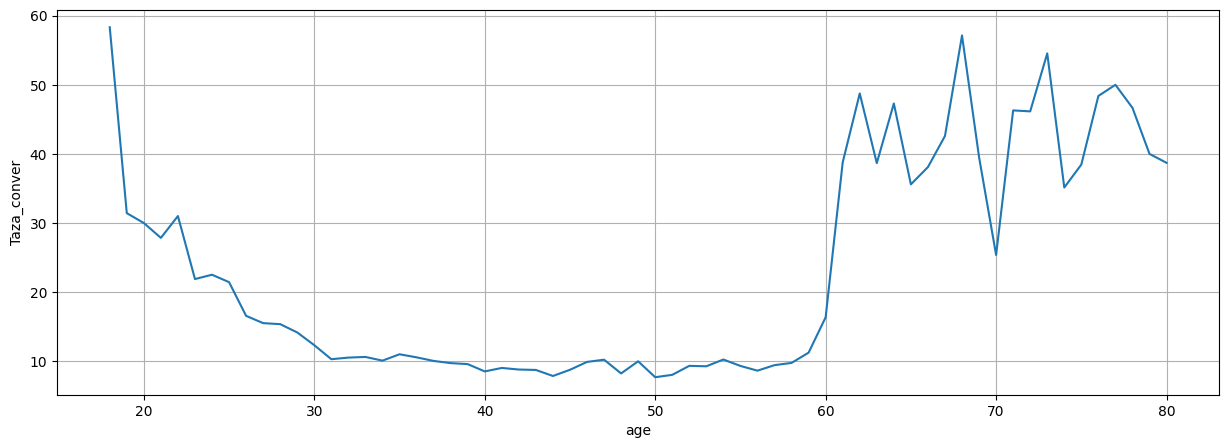

In [25]:
###
# Relación edad  con salida año tras año
###
grupo = df_bancos_clean.groupby('age')['y_bin'].mean().mul(100).rename('Taza_conver').reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(x='age', y='Taza_conver', data=grupo)
plt.grid()
plt.show()

In [26]:
###
# Crear una colimna con subgrupo de edades
###
df_bancos_clean.loc[:, 'grupo_edades'] = '18-28'
df_bancos_clean.loc[(df_bancos_clean['age'] > 26) & (df_bancos_clean['age'] <= 60), 'grupo_edades'] = '27-60'
df_bancos_clean.loc[(df_bancos_clean['age'] > 60, 'grupo_edades')]  = '60+'

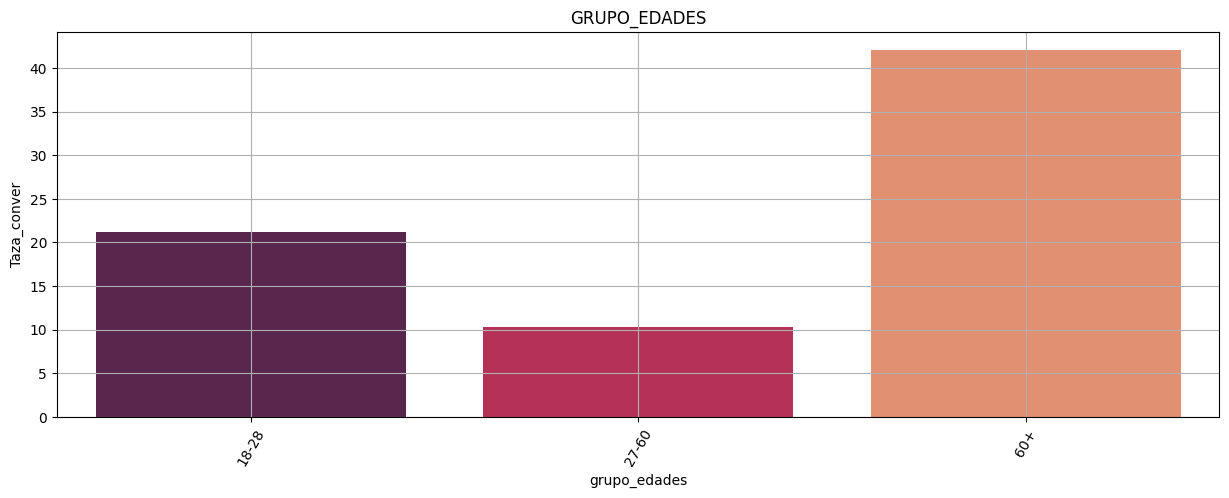

In [27]:
grafica_barras('grupo_edades')

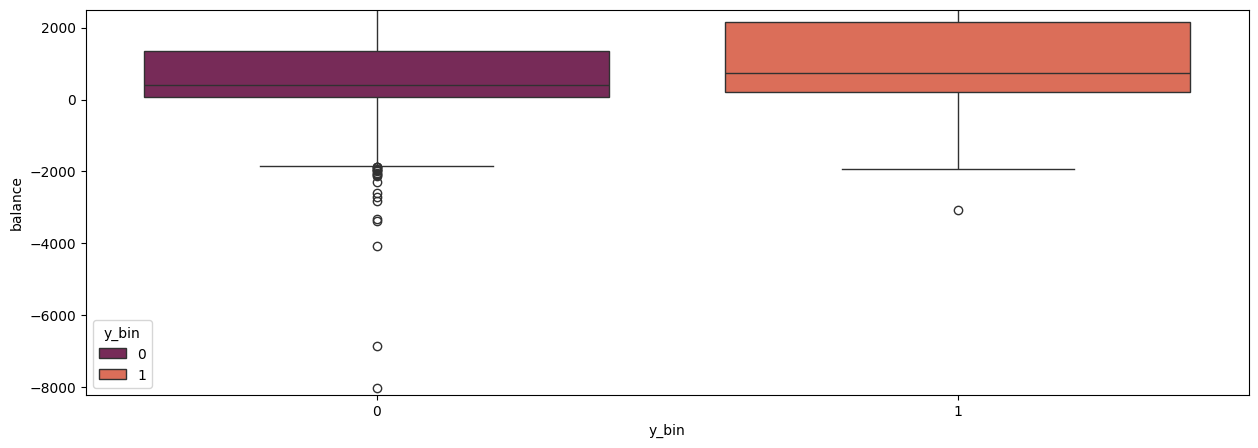

In [28]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='y_bin', y = 'balance', data=df_bancos_clean, hue='y_bin', palette='rocket')
plt.ylim(-8200, 2500)
plt.show()

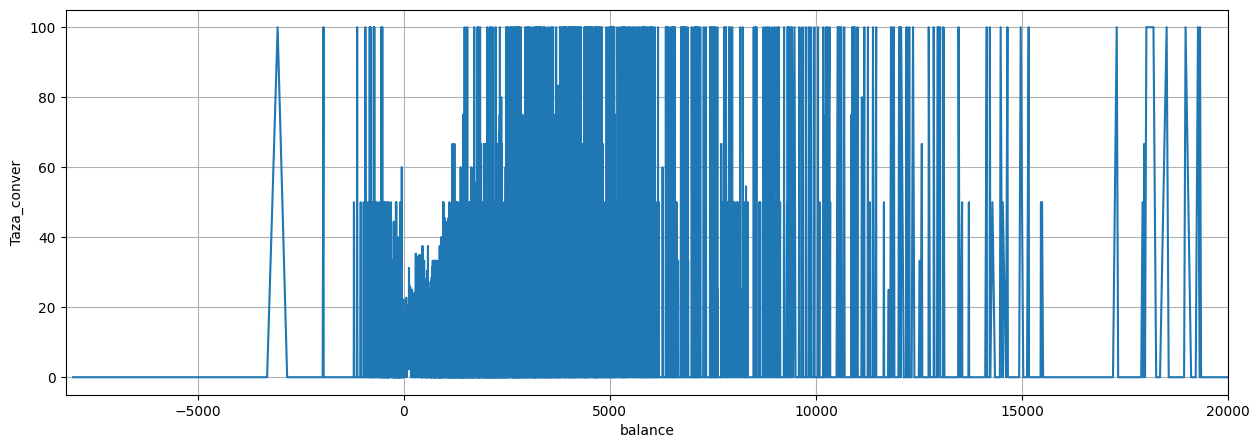

In [29]:
# Relacion de balance con la salida año tras año
grupo = df_bancos_clean.groupby('balance')['y_bin'].mean().mul(100).rename('Taza_conver').reset_index()
plt.figure(figsize=(15, 5))
sns.lineplot(x='balance', y='Taza_conver', data=grupo)
plt.xlim(-8200, 20000)
plt.grid()
plt.show()

In [34]:
# Crear una columna con subgrupos de balance
df_bancos_clean.loc[:, 'grupos_balance'] = '<0'
df_bancos_clean.loc[(df_bancos_clean['balance'] >= 0) & (df_bancos_clean['balance'] < 4800), 'grupos_balance'] = '0-4.8K'
df_bancos_clean.loc[(df_bancos_clean['balance'] >= 4800) & (df_bancos_clean['balance'] < 8000), 'grupos_balance'] = '4.8K-8K'
df_bancos_clean.loc[(df_bancos_clean['balance'] >= 8000) & (df_bancos_clean['balance'] < 12000), 'grupos_balance'] = '8K-12K'
df_bancos_clean.loc[(df_bancos_clean['balance'] >= 12000) & (df_bancos_clean['balance'] < 16000), 'grupos_balance'] = '12K-16K'
df_bancos_clean.loc[(df_bancos_clean['balance'] >= 16000) & (df_bancos_clean['balance'] < 20000), 'grupos_balance'] = '16K-20'
df_bancos_clean.loc[df_bancos_clean['balance'] > 20000, 'grupos_balance'] = '>20K'

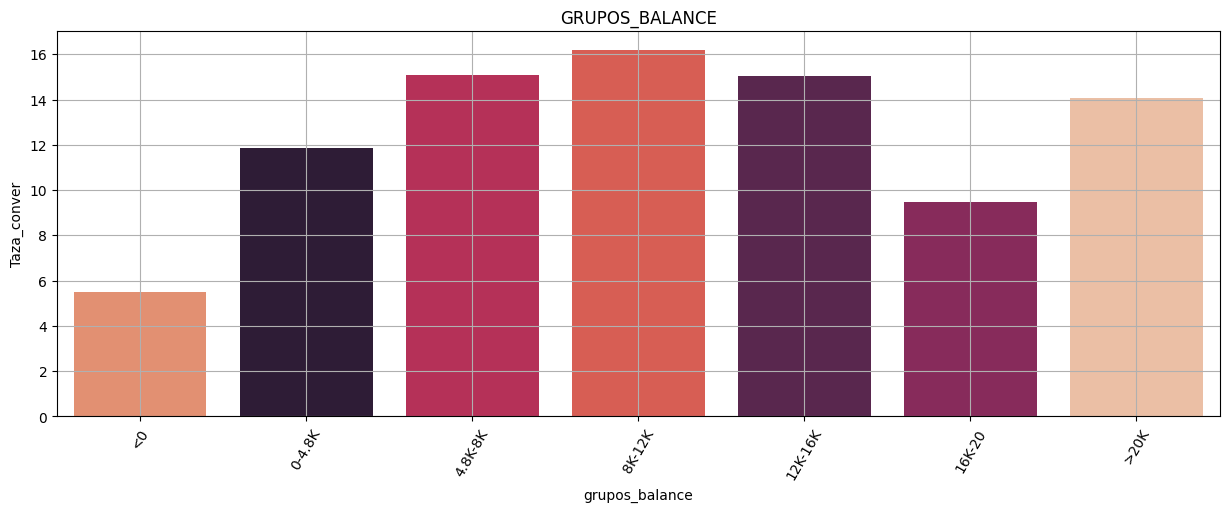

In [35]:
orden = ['<0', '0-4.8K', '4.8K-8K','8K-12K', '12K-16K', '16K-20', '>20K']
grafica_barras('grupos_balance', orden)

In [37]:
# Re codifico la columna con subgrupos de balance
df_bancos_clean.loc[:, 'grupos_balance'] = '<0'
df_bancos_clean.loc[(df_bancos_clean['balance'] >= 0) & (df_bancos_clean['balance'] < 4800), 'grupos_balance'] = '0-4.8K'
df_bancos_clean.loc[(df_bancos_clean['balance'] >= 4800) & (df_bancos_clean['balance'] < 16000), 'grupos_balance'] = '4.8K-16K'
df_bancos_clean.loc[(df_bancos_clean['balance'] >= 16000) & (df_bancos_clean['balance'] < 20000), 'grupos_balance'] = '16K-20'
df_bancos_clean.loc[df_bancos_clean['balance'] > 20000, 'grupos_balance'] = '>20K'

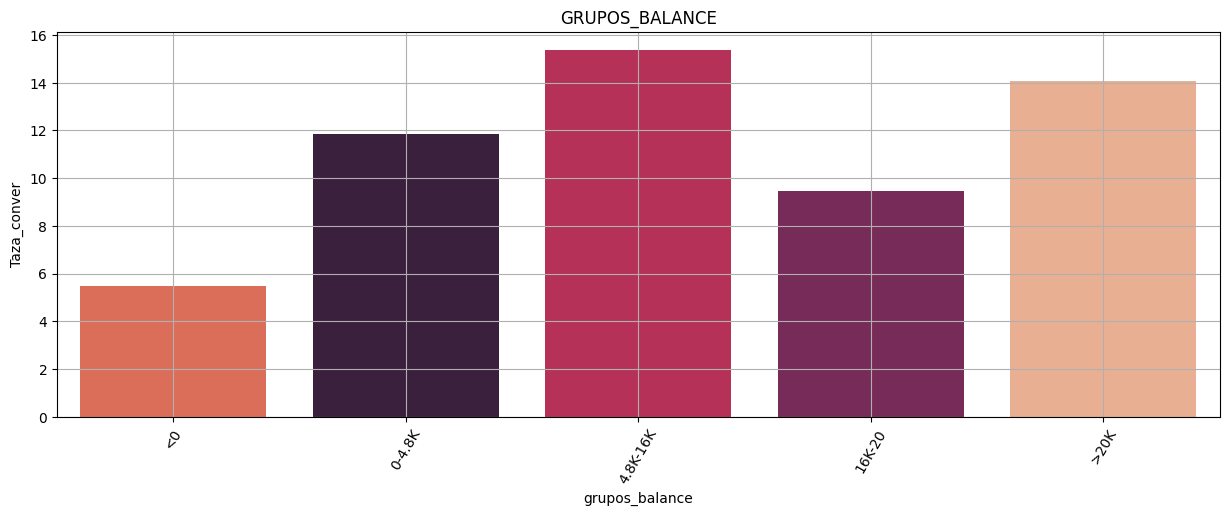

In [38]:
orden = ['<0', '0-4.8K', '4.8K-16K', '16K-20', '>20K']
grafica_barras('grupos_balance', orden)